# Введение


В этом ноутбуке я попытался произвести разведовательный анализ данных доставки последней мили компании Amazon в Индии. Я очистил данные, сформулировал и проверил гипотезы на независимых парных выборках, на нескольких независимых выборках, а также проверил корреляцию числовых признаков.
    
Ссылка на датасет: https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset/data


# Очистка данных

Импорт стандартных библиотек

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Загрузка датасета

In [288]:
data = pd.read_csv('amazon_delivery.csv')
pd.DataFrame(data)
data.head()

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       Sunny    High   motorcycle           Urban             120   
1      Stormy     Jam      scooter   Metropolitian             165   
2  Sandstorms     Low   motorcycle           Urban             130   
3       Sunny  Medium   motorcycle   Metropolitian             105   
4      Cloudy    High      scooter   Metropolitian             150   

      Category  
0     Clothing  
1  Electronics  
2       Sports  
3    Cosmetics  
4         Toys

Видим что датасет содержит информацию о курьере: возраст, рейтинг, транспорт, географическую информацию: координаты склада, пункта назначения и местности, в которой был оформлен заказ, информацию о дате и времени, также информацию о погоде, трафике, и категории товара.

На всякий случай перемешаем данные, вдруг они расположены по таблице не случайно(это пригдится, когда будем их делить в будущем)

In [289]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(inplace=True, drop=True)

Посмотрим информацию о типах данных

In [290]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


Видим, что:
1) Есть немного пропусков в данных о рейтинге и о погоде
2) Категориальные данные имеют тип object, с ним неудобно работать, поэтому приведём их к типу string

In [291]:
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  string 
 1   Agent_Age        43739 non-null  Int64  
 2   Agent_Rating     43685 non-null  Float64
 3   Store_Latitude   43739 non-null  Float64
 4   Store_Longitude  43739 non-null  Float64
 5   Drop_Latitude    43739 non-null  Float64
 6   Drop_Longitude   43739 non-null  Float64
 7   Order_Date       43739 non-null  string 
 8   Order_Time       43739 non-null  string 
 9   Pickup_Time      43739 non-null  string 
 10  Weather          43648 non-null  string 
 11  Traffic          43739 non-null  string 
 12  Vehicle          43739 non-null  string 
 13  Area             43739 non-null  string 
 14  Delivery_Time    43739 non-null  Int64  
 15  Category         43739 non-null  string 
dtypes: Float64(5), Int64(2), string(9)
memory usage: 5.6 MB


Посмотрим на основные статистические показатели

In [251]:
data.describe()

Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count    43739.0       43685.0         43739.0          43739.0   
mean   29.567137       4.63378        17.30268        70.708808   
std     5.815155      0.334716        7.557614        21.317645   
min         15.0           1.0      -30.902872       -85.316842   
25%         25.0           4.5       12.933298        73.170283   
50%         30.0           4.7       18.554382        75.898497   
75%         35.0           4.9       22.732225        78.045359   
max         50.0           6.0       30.914057        88.433452   

       Drop_Latitude  Drop_Longitude  Delivery_Time  
count        43739.0         43739.0        43739.0  
mean       17.459031       70.821842     124.905645  
std          7.34295       21.153148      51.915451  
min             0.01            0.01           10.0  
25%        12.985996           73.28           90.0  
50%        18.633626       76.002574          125.0  
75%        22.785049       78.104095          160.0  
max        31.054057       88.563452          270.0

Видим, что:
1) Есть отрицательные значения ширины и долготы, что странно, ведь Индия полностью находится в северном и восточном полушариях
2) Странный максимальный рейтинг 6.0 


Посмотрим на данные с пропусками

In [293]:
data.loc[ data['Weather'].isnull() , :]

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
401    kkex403947052         50           6.0      -22.651847   
905    wgdm794380305         50           6.0      -12.939496   
1221   jthh363774386         15           1.0      -23.351058   
1443   wyxb425003534         15           1.0       -10.96185   
1976   tznn437423907         50           6.0      -26.910262   
...              ...        ...           ...             ...   
41664  snrv920916364         15           1.0       12.334022   
42052  dglo017356762         50           6.0      -12.975377   
42881  qknx445133757         15           1.0       -13.02978   
43184  hefs309806580         50           6.0       23.235123   
43390  pbox816153129         15           1.0       21.149569   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
401         -75.881991      22.711847       75.941991  2022-03-05       NaN    
905          77.625999      12.949496       77.635999  2022-03-19       NaN    
1221        -85.325731      23.421058       85.395731  2022-03-27       NaN    
1443        -76.971082       11.09185       77.101082  2022-03-02       NaN    
1976        -75.783013      27.020262       75.893013  2022-03-18       NaN    
...                ...            ...             ...         ...        ...   
41664        76.618203      12.354022       76.638203  2022-03-01       NaN    
42052       -77.696664      13.015377       77.736664  2022-03-01       NaN    
42881       -80.208812       13.13978       80.318812  2022-03-31       NaN    
43184        77.398886      23.325123       77.488886  2022-02-16       NaN    
43390        72.772697      21.209569       72.832697  2022-03-21       NaN    

      Pickup_Time Weather Traffic   Vehicle            Area  Delivery_Time  \
401      19:30:00    <NA>    NaN   bicycle   Metropolitian             150   
905      09:40:00    <NA>    NaN        van  Metropolitian              95   
1221     21:35:00    <NA>    NaN        van  Metropolitian             220   
1443     19:55:00    <NA>    NaN        van  Metropolitian             120   
1976     18:50:00    <NA>    NaN   scooter   Metropolitian             100   
...           ...     ...     ...       ...             ...            ...   
41664    09:35:00    <NA>    NaN   scooter   Metropolitian              65   
42052    13:55:00    <NA>    NaN        van  Metropolitian              75   
42881    22:40:00    <NA>    NaN        van          Urban              75   
43184    23:10:00    <NA>    NaN   bicycle   Metropolitian             195   
43390    22:10:00    <NA>    NaN   bicycle   Metropolitian             100   

        Category  
401         Toys  
905        Books  
1221      Snacks  
1443       Books  
1976    Skincare  
...          ...  
41664   Outdoors  
42052  Cosmetics  
42881   Outdoors  
43184       Toys  
43390   Clothing  

[91 rows x 16 columns]

In [295]:
data.loc[ data['Agent_Rating'].isnull() , :]

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
124    dhhe511854924         33          <NA>       30.346994   
728    ucgs229964645         35          <NA>             0.0   
1483   yseg007856175         21          <NA>       23.264015   
2193   yvry883331119         28          <NA>       19.878028   
2648   ichv590071044         20          <NA>       23.264015   
4209   ohgx024912559         32          <NA>       19.874733   
5280   ilse030322540         22          <NA>       15.576683   
5544   ogxf318978500         20          <NA>       25.451517   
5615   zvvx532000255         22          <NA>       30.899584   
6592   wzqm392542253         31          <NA>       25.454648   
7645   ahat200403195         24          <NA>        15.49395   
7757   uurs547552548         23          <NA>       22.569358   
8288   upsk673844971         26          <NA>       19.879631   
9251   obhw498097510         22          <NA>        22.53796   
10280  nrbt905510946         39          <NA>             0.0   
10437  dfkd032496505         36          <NA>      -15.516833   
10443  xpuz546721523         24          <NA>             0.0   
10767  rjlc674529490         30          <NA>       25.454648   
11079  xcof278841291         28          <NA>      -23.184992   
11309  eeby841641602         34          <NA>       26.483042   
11329  aauz389530138         33          <NA>             0.0   
12165  akkd436068128         25          <NA>       25.449872   
12238  cueo271109804         27          <NA>       22.515082   
14741  ttuj742500790         37          <NA>      -30.899584   
15484  gjcr517387117         26          <NA>             0.0   
16633  fctw514165232         37          <NA>             0.0   
18490  dbkt581015249         38          <NA>        15.51315   
18981  rnxw744842409         33          <NA>             0.0   
19550  lvxf754191678         36          <NA>             0.0   
22919  rpgm542793380         24          <NA>       30.372202   
24814  lsaf664227465         36          <NA>       30.895817   
25166  dapn642021121         30          <NA>         22.5491   
25288  qhka163034669         20          <NA>       22.514585   
26328  upag442553026         20          <NA>       23.214294   
26470  lyrg933676148         38          <NA>       23.266261   
27283  mwih952877567         35          <NA>       22.552672   
28684  mwdc565687808         20          <NA>      -22.547186   
31701  xoaj834389107         32          <NA>             0.0   
31992  mwec902427320         23          <NA>       26.471617   
32463  nrdn256621599         35          <NA>       27.157772   
33299  qvmp308181852         20          <NA>        15.51315   
33605  phcw601223455         29          <NA>       15.506205   
34263  ynpr068241702         36          <NA>       -9.970717   
34802  tcfq193647029         20          <NA>       10.000706   
35343  hdyu400237098         37          <NA>       15.585658   
35866  zhvo744209205         39          <NA>             0.0   
37635  tvng587700125         25          <NA>        15.51315   
37759  xouo404898660         28          <NA>       22.552672   
39709  hfed710539627         38          <NA>       26.492106   
40123  lasr795083832         23          <NA>       25.454648   
41807  nidv234693537         30          <NA>       27.159795   
41952  fhuy012073546         35          <NA>       19.875908   
42440  cpnj776064961         30          <NA>       22.552996   
43595  cijg134201397         20          <NA>       19.880256   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
124          78.062543      30.406994       78.122543  2022-02-13   23:50:00   
728                0.0           0.01            0.01  2022-02-15   08:45:00   
1483         77.408236      23.334015       77.478236  2022-02-14   23:35:00   
2193         75.317475      19.888028       75.327475  2022-02-11   09:00:00   
2648         77.408236      23.29401

Данные с пропусками по погоде выглядят очень странно, есть незамеченные функцией isnull пропуски по траффику и времени заказа, также данные о возрасте и рейтинге курьеров выглядят как выбросы, думаю эти строки лучше исключить из рассмотрения.

Данные с пропусками по рейтингу курьеров выглядят не так странно, возможно это данные новых курьеров, у которых ещё не было рейтинга на момент заказа, думаю с ними можно работать, заполнив пропуски медианной

In [297]:
cl_data = data.dropna(subset=['Weather'])
cl_data['Agent_Rating'] = data['Agent_Rating'].fillna(data['Agent_Rating'].median())

C:\Users\samar\AppData\Local\Temp\ipykernel_1872\249988888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['Agent_Rating'] = data['Agent_Rating'].fillna(data['Agent_Rating'].median())


Ещё раз проверим на пропуски

In [299]:
cl_data.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

Проверим на те пропуски, которые не видит функция isnull

In [309]:
#Пропуски времени заказа
print(data.loc[data['Order_Time'] == 'NaN ' , :].count(), " ", cl_data.loc[cl_data['Order_Time'] == 'NaN ', :].count())

Order_ID           91
Agent_Age          91
Agent_Rating       91
Store_Latitude     91
Store_Longitude    91
Drop_Latitude      91
Drop_Longitude     91
Order_Date         91
Order_Time         91
Pickup_Time        91
Weather             0
Traffic            91
Vehicle            91
Area               91
Delivery_Time      91
Category           91
dtype: int64   Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


In [310]:
#Пропуски трафика
print(data.loc[data['Order_Time'] == 'NaN ' , :].count(), " ", cl_data.loc[cl_data['Order_Time'] == 'NaN ', :].count())

Order_ID           91
Agent_Age          91
Agent_Rating       91
Store_Latitude     91
Store_Longitude    91
Drop_Latitude      91
Drop_Longitude     91
Order_Date         91
Order_Time         91
Pickup_Time        91
Weather             0
Traffic            91
Vehicle            91
Area               91
Delivery_Time      91
Category           91
dtype: int64   Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


Видим, что всё отлично, с пропусками погоды пропали также пропуски по времени и трафику

Теперь разберёмся с отрицательными значениями координат складов

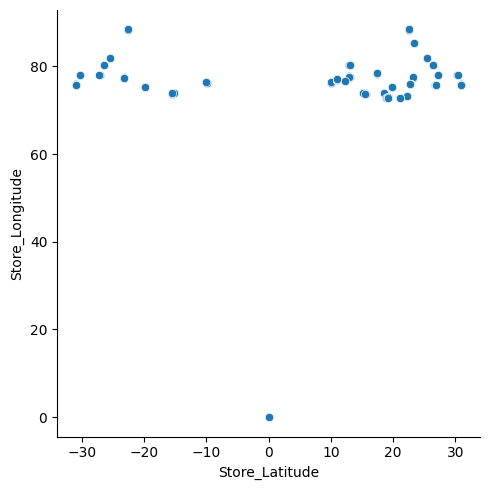

In [313]:
sns.relplot(data=cl_data, x="Store_Latitude", y="Store_Longitude")

На графике видно, что отрицательные значения по широте пропали, но остались отрицательные значения по долготе

Посмотрим внимательнее, исключив выбросы(близкие к 0 значения)

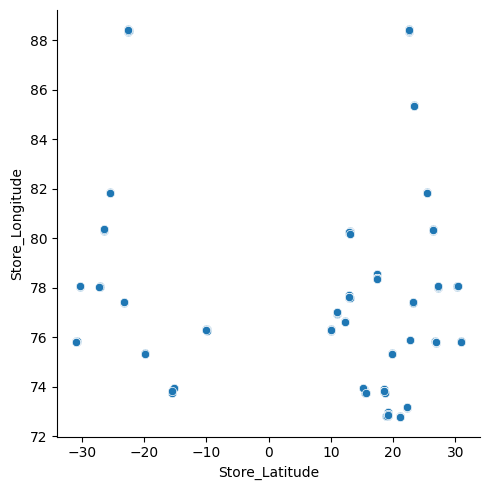

In [314]:

sns.relplot(data=cl_data.loc[cl_data['Store_Longitude'] > 5, :], x="Store_Latitude", y="Store_Longitude")

Скорее всего к координатам некоторых складов случайно добавили минус

In [340]:
#Тут я сделал множество абсолютных значений координат складов...
neg_lat = cl_data.loc[(cl_data['Store_Longitude'] > 5) & (cl_data['Store_Latitude'] < 0), 'Store_Latitude'].unique()
pos_lat = cl_data.loc[(cl_data['Store_Longitude'] > 5) & (cl_data['Store_Latitude'] > 0), 'Store_Latitude'].unique()
mix_lat = np.concatenate([-neg_lat, pos_lat])
print(len(pos_lat)/len(np.unique(mix_lat)))
#...и оно совпало с множеством положительных значений

1.0


Да, каждая отрицательная координата склада нашла пару среди положительных, нужно их исправить

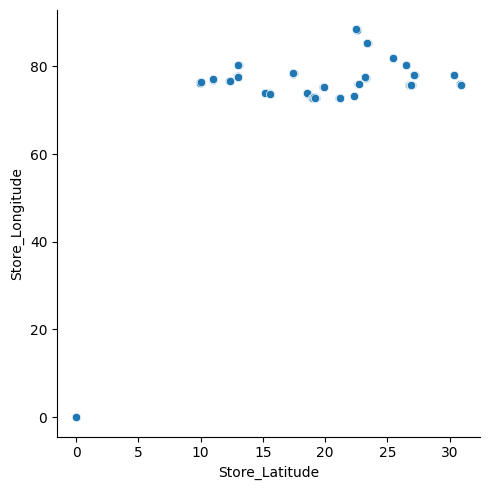

In [344]:
cl_data.loc[cl_data['Store_Latitude'] < 0, 'Store_Latitude'] = -cl_data.loc[cl_data['Store_Latitude'] < 0, 'Store_Latitude']

sns.relplot(data=cl_data, x="Store_Latitude", y="Store_Longitude")


Теперь всё нормально, за исключением пропусков, с ними разберёмся потом, когда будем вводить длину пути 

Ещё разок посмотрим на статистические показатели

In [345]:
cl_data.describe()

Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count    43648.0       43648.0         43648.0          43648.0   
mean   29.555008      4.635367       17.398811        70.761342   
std     5.761482      0.313641        7.340514        21.145246   
min         20.0           2.5             0.0              0.0   
25%         25.0           4.5       12.934179        73.170283   
50%         30.0           4.7       18.554382        75.898497   
75%         35.0           4.9       22.732225        78.045359   
max         39.0           5.0       30.914057        88.433452   

       Drop_Latitude  Drop_Longitude  Delivery_Time  
count        43648.0         43648.0        43648.0  
mean       17.462404       70.824935     124.914475  
std         7.341862       21.145411      51.933163  
min             0.01            0.01           10.0  
25%        12.986229           73.28           90.0  
50%        18.633934       76.002471          125.0  
75%        22.785089       78.103395          160.0  
max        31.054057       88.563452          270.0

Видим, что также удалось избавиться от подозрительных значений рейтинга и возраста курьеров

И наконец проверим данные на повторы

In [348]:
cl_data.duplicated().sum()

0

Повторов нет, можно двигаться дальше

In [365]:
#Тут я додумался убрать предупреждения, чтобы не мешались
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

# Feature engeniering

На основе имеющихся данных посчитаем немного новых характеристик

Во первых приведём данные о дате в удобный формат

In [366]:

cl_data['Order_Date'] = pd.to_datetime(cl_data['Order_Date'])
cl_data['Year'] = cl_data['Order_Date'].dt.year
cl_data['Month'] = cl_data['Order_Date'].dt.month
cl_data['Day'] = cl_data['Order_Date'].dt.day
cl_data['Weekday'] = cl_data['Order_Date'].dt.weekday


cl_data['Order_Time'] = pd.to_datetime(cl_data['Order_Time'], format='%H:%M:%S', errors='coerce')
cl_data['Pickup_Time'] = pd.to_datetime(cl_data['Pickup_Time'], format='%H:%M:%S', errors='coerce')
cl_data['Order_Pickup_Delta'] = (((cl_data['Pickup_Time'] - cl_data['Order_Time']).dt.seconds)//60)%60
cl_data['Order_Hour'] = cl_data['Order_Time'].dt.hour
cl_data['Pickup_Hour'] = cl_data['Pickup_Time'].dt.hour



Удалим ненужные столбцы

In [369]:
cl_data.drop(['Order_Date', 'Order_Time', 'Pickup_Time'], axis=1, inplace=True)

In [370]:
cl_data.head()

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  hout451755035         23           4.7        27.16185        78.040165   
1  xdwq172378191         39           4.9             0.0              0.0   
2  nsmt599494333         26           4.8       13.022394        80.242439   
3  jknz724879108         37           4.9       12.975377        77.696664   
4  hwit304120160         34           3.6       10.035573        76.336958   

   Drop_Latitude  Drop_Longitude Weather Traffic      Vehicle            Area  \
0       27.25185       78.130165   Windy    Jam   motorcycle   Metropolitian    
1           0.09            0.09  Cloudy    Low      scooter   Metropolitian    
2      13.032394       80.252439   Sunny    Low      scooter   Metropolitian    
3      13.005377       77.726664   Sunny    Low   motorcycle   Metropolitian    
4      10.125573       76.426958  Cloudy    Low      scooter   Metropolitian    

   Delivery_Time   Category  Year  Month  Day  Weekday  Order_Hour  \
0             80   Skincare  2022      2   14        0          21   
1            135  Cosmetics  2022      2   18        4          23   
2            120     Snacks  2022      3    1        1          10   
3             80     Snacks  2022      3   13        6          23   
4            185      Shoes  2022      2   14        0          22   

   Pickup_Hour  Order_Pickup_Delta  
0           21                  10  
1           23                  10  
2           11                   5  
3           23                  10  
4           22                   5

Всё сработало

Теперь специализируем данные по крупнейшим агломерациям в Индии -- это Мумбай, Бангалор и Чиннай(информации из Нью-Дели нет в этом датасете)

In [374]:
cl_data.loc[:,'City'] = 'Other'

#Обозначим примерные границы городов. Первые два значения -- границы по широте, остальные по долготе
borders = {'Mumbai' : [18.75, 19.43, 72.5, 73.19],
           'Chinai' : [12.80, 13.25, 80.03, 80.34],
           'Bangalore': [12.7, 13.17, 77.37, 77.78],
          }

for item in borders.keys():
    cl_data.loc[(cl_data['Store_Latitude'] >= borders[item][0]) & (cl_data['Store_Latitude'] <= borders[item][1]) & (cl_data['Store_Longitude'] >= borders[item][2]) & (cl_data['Store_Longitude'] <= borders[item][3]) & (cl_data['Area'] == "Metropolitian "), 'City'] = item 
cl_data['City'].value_counts()

City
Other        36880
Mumbai        2262
Chinai        2254
Bangalore     2252
Name: count, dtype: int64

Посчитаем длину пути от склада до места назначения с помощью open source routing machine https://project-osrm.org/

!!!работает несколько часов так как несколько десятков тысяч запросов

In [ ]:
import requests
def route_distance(coords):

    r = requests.get('http://router.project-osrm.org/route/v1/driving/' + str(coords[0]) + ',' + str(coords[1]) + ';' + str(coords[2]) + ',' + str(coords[3]) + '?overview=false')
    
    if(r.json()['code'] == 'Ok'):
        return int(r.json()['routes'][0]['distance'])
    else:
        return 0

dist = []

for item in cl_data.itertuples():
    c = [item.Store_Longitude, item.Store_Latitude, item.Drop_Longitude, item.Drop_Latitude]
    dist.append(route_distance(c))

Привяжем значения к ID заказа, чтобы не потерялись

In [ ]:
id_dist = []
for item in cl_data.itertuples():
    id_dist.append((item.Order_ID, item.Route_Distance))

Добавим полученные значения длины пути в датафрейм


In [405]:
ord_dist = []

for item in cl_data.itertuples():
    for pair in id_dist:
        if(item.Order_ID == pair[0]):
            ord_dist.append(pair[1])

cl_data.loc[:,'Route_Distance'] = ord_dist

После этого можно удалить значения координат, они больше не понадобятся

In [419]:
#что-то типа сохранения
f_data = cl_data.loc[:,:]

In [420]:
cl_data.drop(['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'], axis=1, inplace=True)

In [421]:
cl_data.head()

Order_ID  Agent_Age  Agent_Rating Weather Traffic      Vehicle  \
0  hout451755035         23           4.7   Windy    Jam   motorcycle    
1  xdwq172378191         39           4.9  Cloudy    Low      scooter    
2  nsmt599494333         26           4.8   Sunny    Low      scooter    
3  jknz724879108         37           4.9   Sunny    Low   motorcycle    
4  hwit304120160         34           3.6  Cloudy    Low      scooter    

             Area  Delivery_Time   Category  Year  Month  Day  Weekday  \
0  Metropolitian              80   Skincare  2022      2   14        0   
1  Metropolitian             135  Cosmetics  2022      2   18        4   
2  Metropolitian             120     Snacks  2022      3    1        1   
3  Metropolitian              80     Snacks  2022      3   13        6   
4  Metropolitian             185      Shoes  2022      2   14        0   

   Order_Hour  Pickup_Hour  Order_Pickup_Delta       City  Route_Distance  
0          21           21                  10      Other           21102  
1          23           23                  10      Other               0  
2          10           11                   5     Chinai            2016  
3          23           23                  10  Bangalore            7367  
4          22           22                   5      Other           21143

Теперь разберёмся с пропусками по расстоянию

In [410]:
cl_data.loc[cl_data['Route_Distance'] == 0, 'Route_Distance'].count()

3515

^ вот сколько их


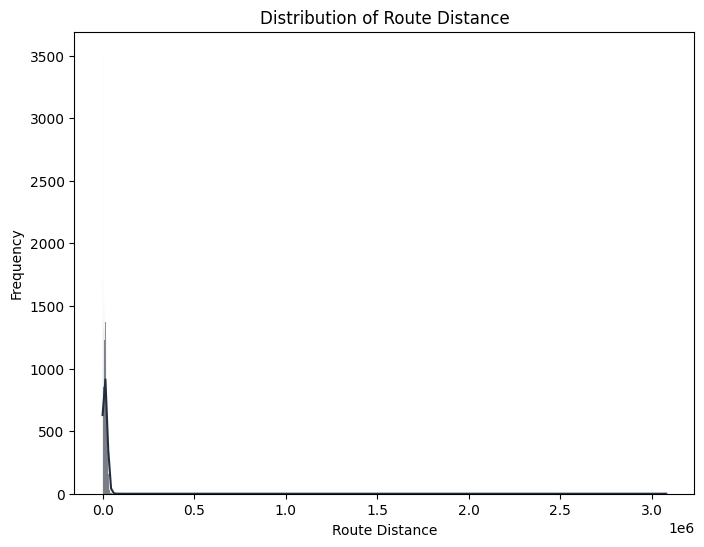

In [412]:
plt.figure(figsize=(8, 6))
sns.histplot(cl_data['Route_Distance'], kde=True, color='#232f3e')
plt.title(f'Distribution of Route Distance')
plt.xlabel('Route Distance')
plt.ylabel('Frequency')
plt.show()

Вот какая часть наших данных -- пропуски по длине пути:

In [417]:
cl_data.loc[cl_data['Route_Distance'] == 0, 'Route_Distance'].count()/cl_data.shape[0]

0.08053060850439883

А вот какая -- очень большие значения, наверное выбросы:

In [418]:
cl_data.loc[cl_data['Route_Distance'] > 100000, 'Route_Distance'].count()/cl_data.shape[0]

0.001282991202346041

Вот как выглядит распределение длин пути без этих гадостей:

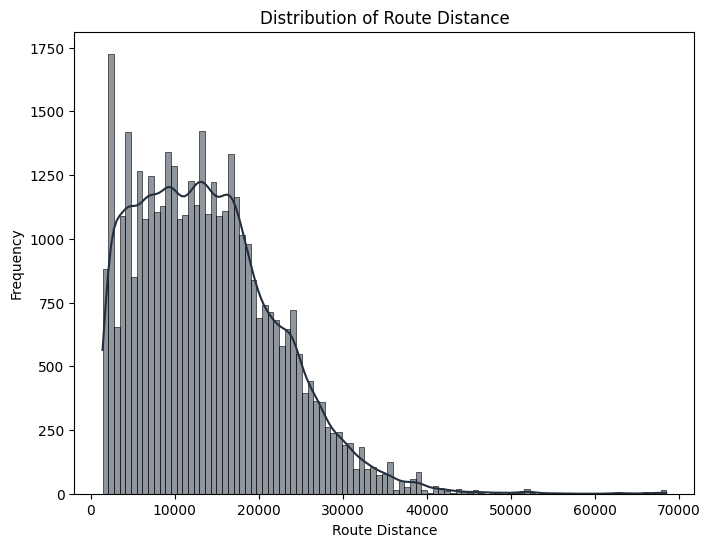

In [414]:
plt.figure(figsize=(8, 6))
sns.histplot(cl_data.loc[(cl_data['Route_Distance']>0) & (cl_data['Route_Distance']<100000), 'Route_Distance'], kde=True, color='#232f3e')
plt.title(f'Distribution of Route Distance')
plt.xlabel('Route Distance')
plt.ylabel('Frequency')
plt.show()

Пропусков и выбросов довольно много, их сложно заполнить, поскольку длина пути очевидно сильно сколлерированна с временем доставки и не получится их заполнять абы какими значениями(медианой или выборкой из эмпирического распределения), поэтому лучше исключить пропуски и выбросы из рассмотрения

In [618]:
cl_data_final = cl_data.loc[(cl_data['Route_Distance']>0) & (cl_data['Route_Distance']<100000), :]

Добавим ещё столбец средней скорости доставки, она будет одной из ключевых метрик

In [619]:
cl_data_final.loc[:,'Delivery_Avg_Speed_m/min'] = cl_data_final['Route_Distance']/cl_data_final['Delivery_Time']

In [466]:
cl_data_final.describe()

Agent_Age  Agent_Rating  Delivery_Time     Year         Month  \
count    40077.0       40077.0        40077.0  40077.0  40077.000000   
mean    29.55311      4.633975     125.088255   2022.0      3.000200   
std     5.761561      0.314804       51.93169      0.0      0.533768   
min         20.0           2.5           10.0   2022.0      2.000000   
25%         25.0           4.5           90.0   2022.0      3.000000   
50%         30.0           4.7          125.0   2022.0      3.000000   
75%         35.0           4.9          160.0   2022.0      3.000000   
max         39.0           5.0          270.0   2022.0      4.000000   

                Day       Weekday    Order_Hour   Pickup_Hour  \
count  40077.000000  40077.000000  40077.000000  40077.000000   
mean      13.798538      2.995484     17.424258     17.152906   
std        8.788846      1.970058      4.816374      5.316364   
min        1.000000      0.000000      0.000000      0.000000   
25%        6.000000      1.000000     15.000000     14.000000   
50%       13.000000      3.000000     19.000000     19.000000   
75%       20.000000      5.000000     21.000000     21.000000   
max       31.000000      6.000000     23.000000     23.000000   

       Order_Pickup_Delta  Route_Distance  Delivery_Avg_Speed  \
count        40077.000000    40077.000000             40077.0   
mean             9.982284    13980.959977          141.959026   
std              4.086314     8310.918226            160.3282   
min              5.000000     1408.000000            6.588679   
25%              5.000000     7388.000000           63.540741   
50%             10.000000    13096.000000              102.25   
75%             15.000000    19061.000000          161.069565   
max             15.000000    68460.000000              3269.0   

       Delivery_Avg_Speed_m/min  
count                   40077.0  
mean                 141.959026  
std                    160.3282  
min                    6.588679  
25%                   63.540741  
50%                      102.25  
75%                  161.069565  
max                      3269.0

Статистические показатели внушают доверие, можно двигаться дальше

# Построение графиков, формулирование гипотез

Разделим данные пополам. На одной половине будем формулировать гипотезы и искать закономерности, на другой их проверять

In [467]:
data_view = cl_data_final[0:cl_data_final.count()['Order_ID']//2]

data_check = cl_data_final[cl_data_final.count()['Order_ID']//2:cl_data_final.count()['Order_ID']]
data_check.reset_index(inplace=True, drop=True)

In [468]:
data_view.describe()

Agent_Age  Agent_Rating  Delivery_Time     Year         Month  \
count    20038.0       20038.0        20038.0  20038.0  20038.000000   
mean   29.569867      4.632653      124.96866   2022.0      3.000399   
std     5.776854      0.315107      52.361414      0.0      0.534109   
min         20.0           2.5           10.0   2022.0      2.000000   
25%         25.0           4.5           90.0   2022.0      3.000000   
50%         30.0           4.7          125.0   2022.0      3.000000   
75%         35.0           4.9          160.0   2022.0      3.000000   
max         39.0           5.0          270.0   2022.0      4.000000   

                Day       Weekday    Order_Hour   Pickup_Hour  \
count  20038.000000  20038.000000  20038.000000  20038.000000   
mean      13.765396      2.988921     17.355924     17.097066   
std        8.773762      1.971544      4.857872      5.338154   
min        1.000000      0.000000      0.000000      0.000000   
25%        6.000000      1.000000     15.000000     14.000000   
50%       13.000000      3.000000     19.000000     19.000000   
75%       20.000000      5.000000     21.000000     21.000000   
max       31.000000      6.000000     23.000000     23.000000   

       Order_Pickup_Delta  Route_Distance  Delivery_Avg_Speed  \
count        20038.000000    20038.000000             20038.0   
mean             9.982533    13926.516519           142.23821   
std              4.091909     8323.854662          161.978124   
min              5.000000     1408.000000            7.288889   
25%              5.000000     7318.500000            63.41526   
50%             10.000000    13045.000000          102.193333   
75%             15.000000    18992.000000          161.363424   
max             15.000000    68460.000000              3269.0   

       Delivery_Avg_Speed_m/min  
count                   20038.0  
mean                  142.23821  
std                  161.978124  
min                    7.288889  
25%                    63.41526  
50%                  102.193333  
75%                  161.363424  
max                      3269.0

Посмотрим на то, как распределены категориальные признаки

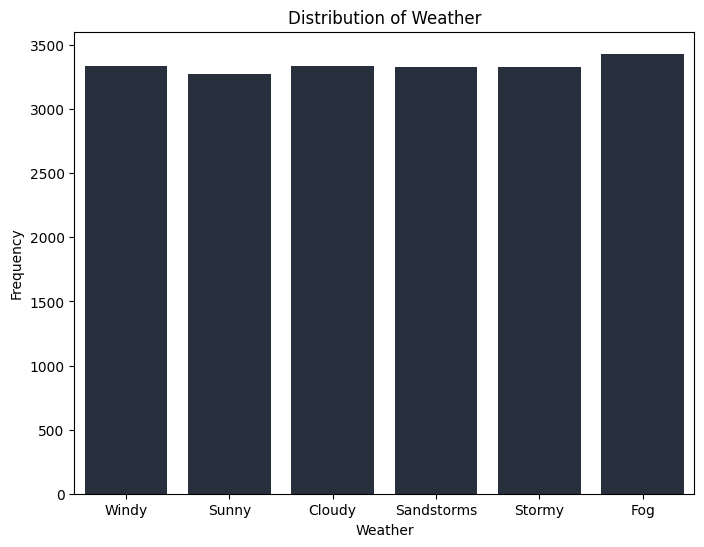

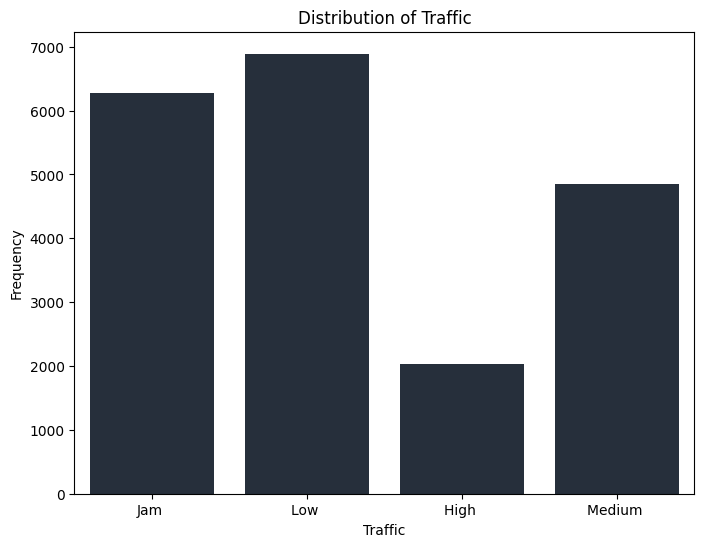

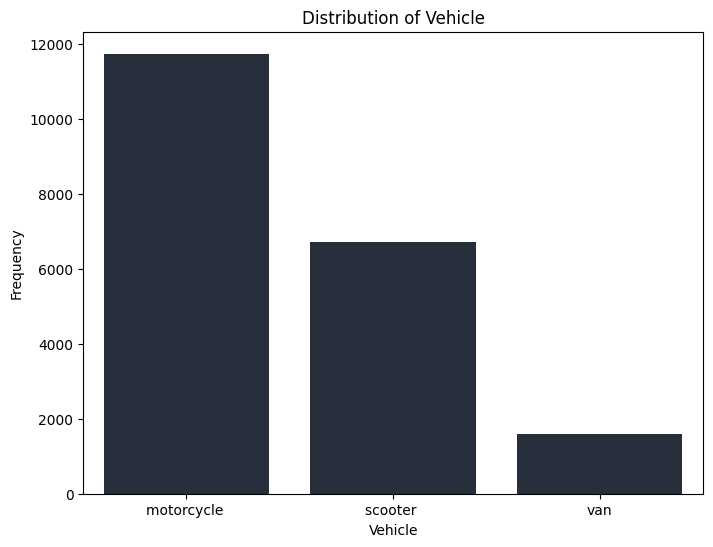

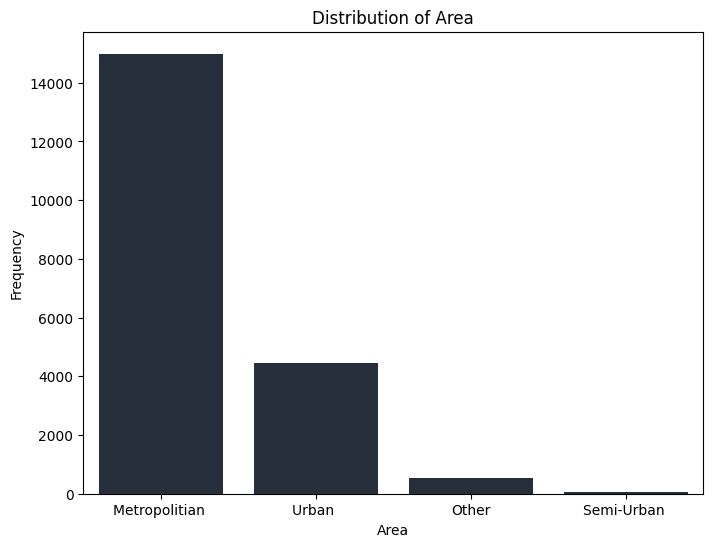

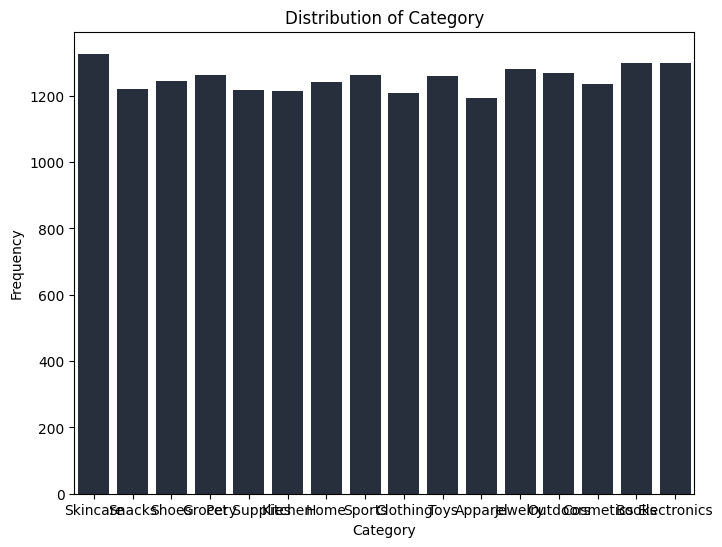

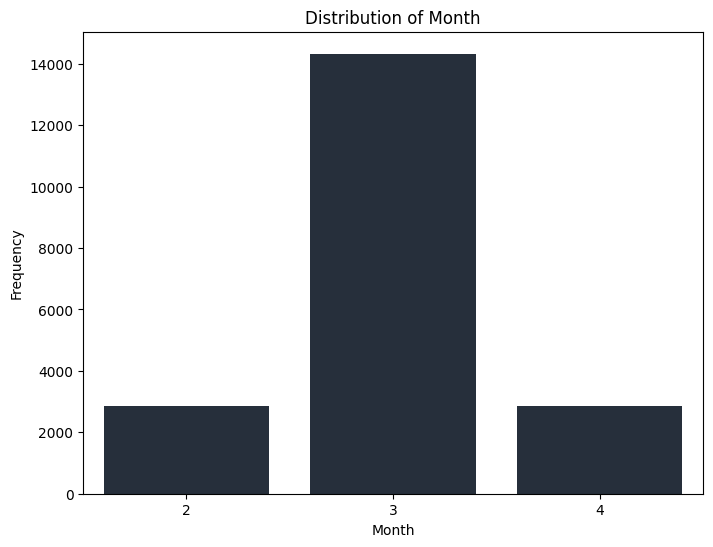

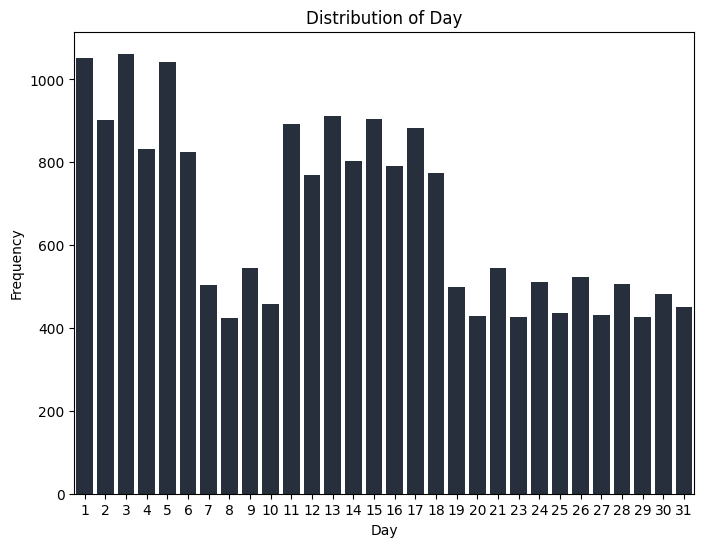

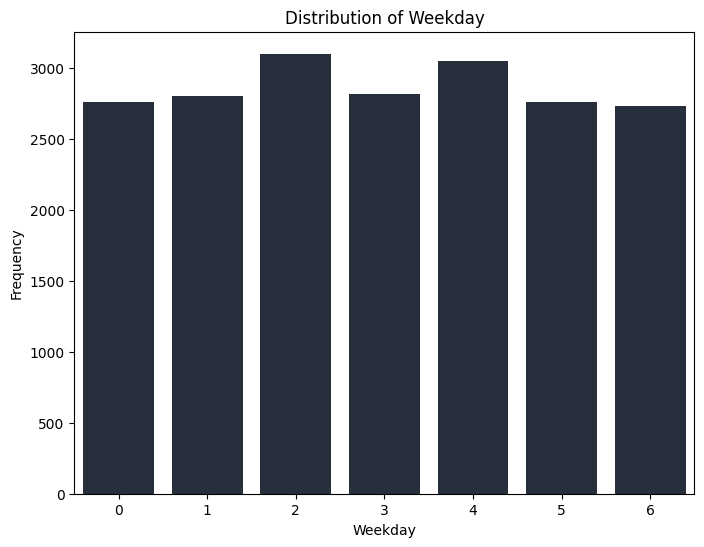

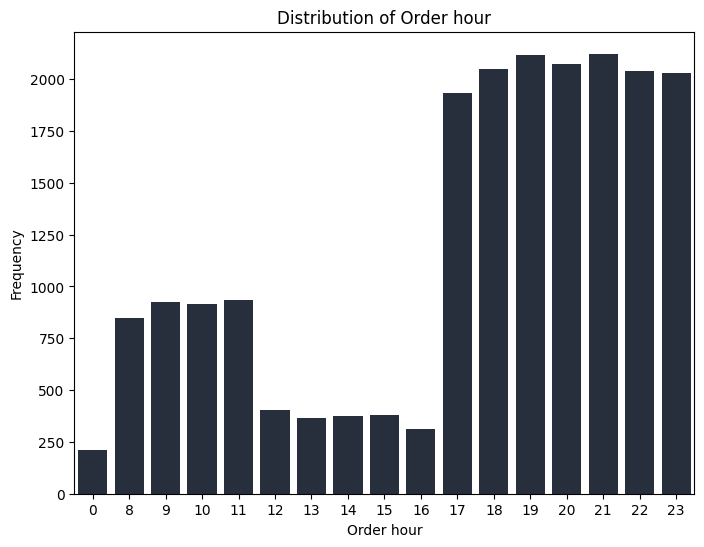

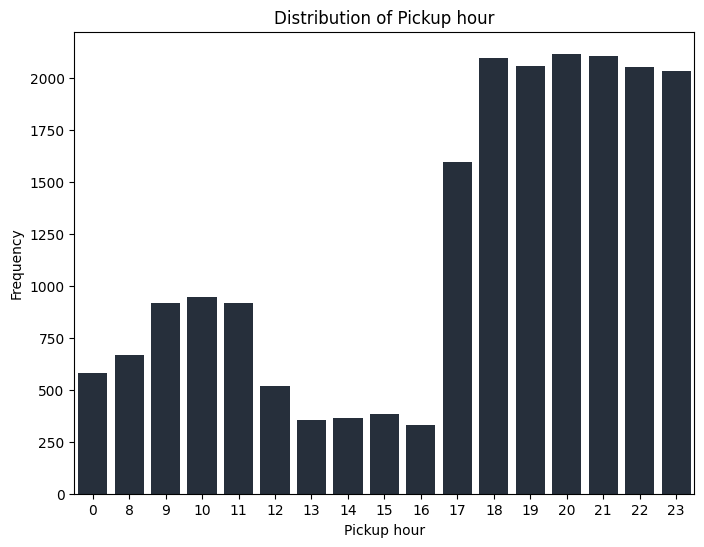

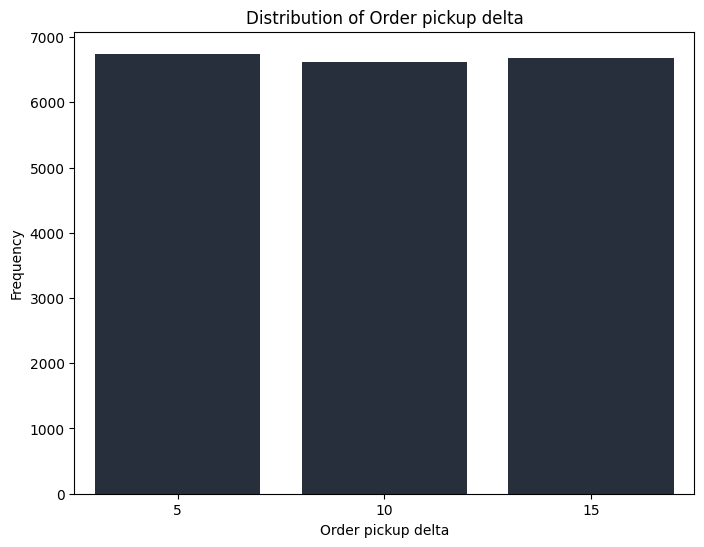

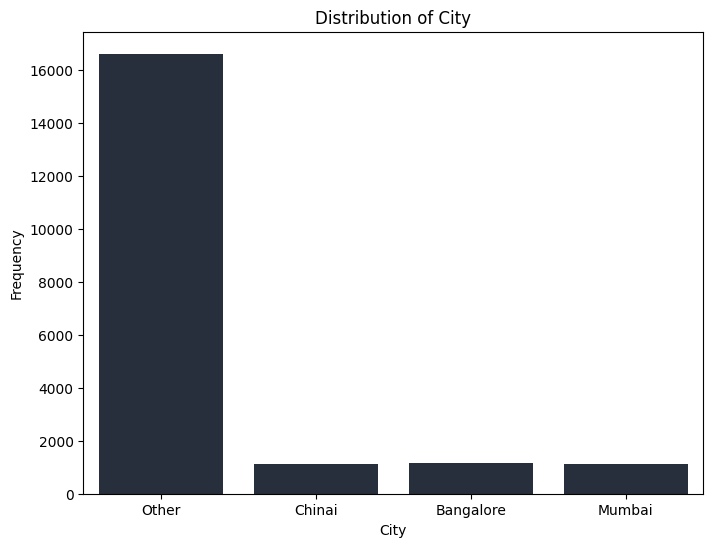

In [469]:
categorial_columns = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category', 'Month', 'Day', 'Weekday', 'Order_Hour', 'Pickup_Hour', 'Order_Pickup_Delta', 'City']
for col in categorial_columns:
    plt.figure(figsize=(8, 6))
    ax= sns.countplot(x=col, data=data_view, color='#232f3e')
    plt.title(f'Distribution of {col.replace("_", " ").capitalize()}')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Frequency')
    plt.show()



Видим, что:
- Погода: данные распределены примерно равномерно, каждый тип погоды равнорепрезентирован
- Трафик: относительно других немного мало данных с высоким трафиком, но не критично
- Транспорт: мало данных о поездках на фургонах, но всё равно достаточно
- Местность: совсем мало данных из полу-городской и из "другой" местности, в дальнейшем будем их игнорировать
- Категория товара: каждая категория равнорепрезентирована в датасете
- Месяц: в датасете представлены данные в период с февраля по апрель(скорее всего не весь февраль и апрель включены)
- День: в начале и середине месяца больше заказов(скорее всего в эти периоды вошли заказы из двух месяцев, а в остальные только мартовские), отсутствуют данные за 22й день(возможно был выходной), а вот чего я не могу объяснить, так это то, почему последовательно день за днём заказов то больше, то меньше
- День недели: все дни недели примерно равнопредставлены
- Время заказа: вечером заказывают очень много, днём очень мало(хотя может нам просто подсунули такие данные)
- Город: заказов в Чиннае, Бангалоре и Мумбае примерно поровну

Теперь посмотрим на распределения числовых признаков

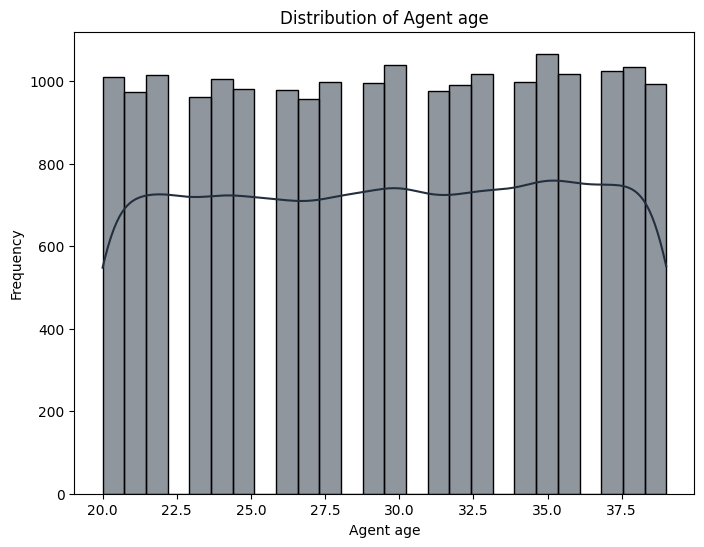

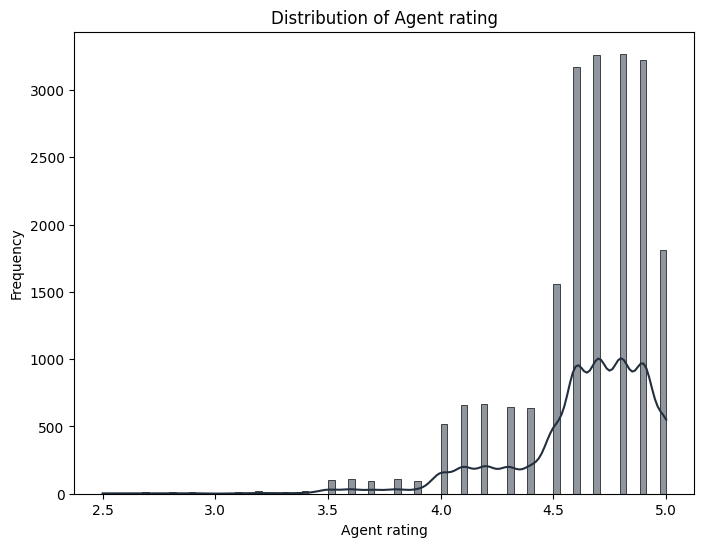

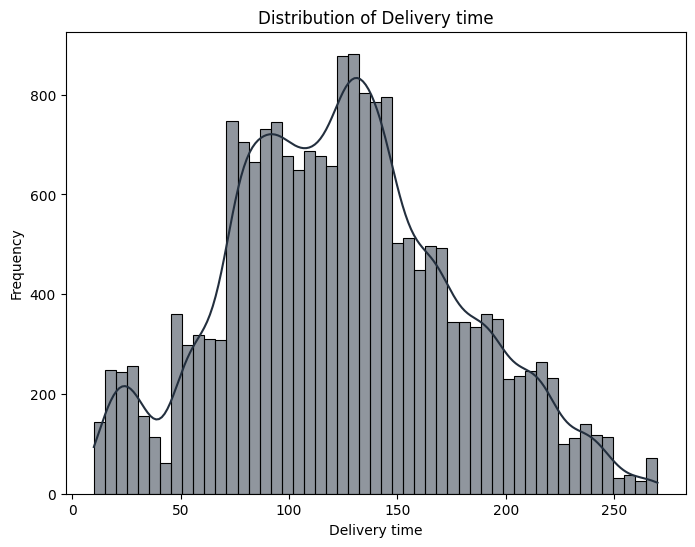

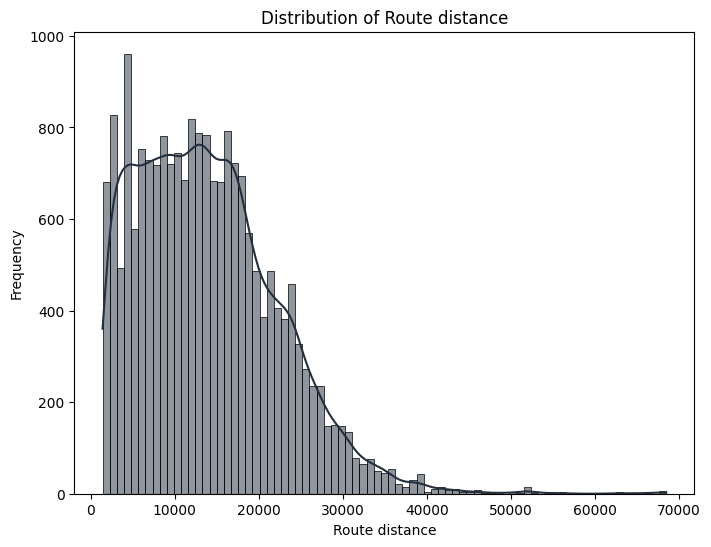

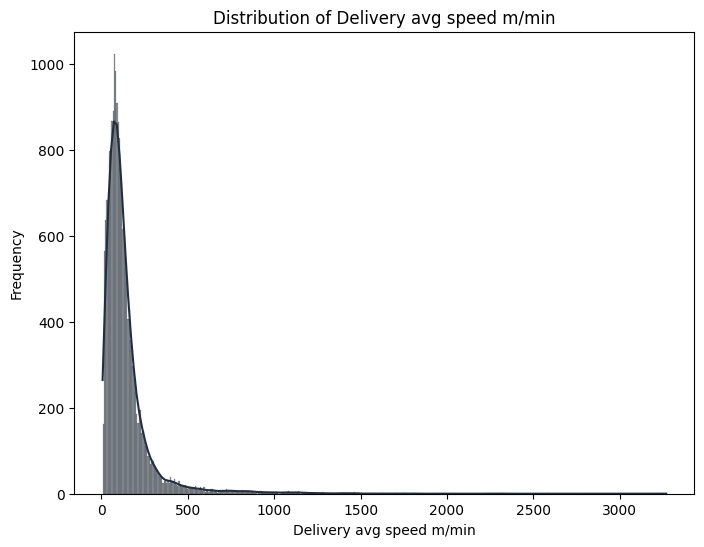

In [484]:
numerical_columns = ['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Route_Distance', 'Delivery_Avg_Speed_m/min']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_view[col], kde=True, color='#232f3e')
    plt.title(f'Distribution of {col.replace("_", " ").capitalize()}')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Frequency')
    plt.show()


Видим, что:
- Возраст курьера: кажется, что распределён равномерно от 20 до 40, можно будет это проверить статистически(но это не особо полезно)
- Рейтинг: основная часть курьеров имеют рейтинг больше 4.5, в дальнейшем мы проведём корелляционный анализ, а также разделим курьеров на две группы: с хорошим и плохим рейтингом, чтобы узнать насколько рейтинг влияет на время и скорость доставки
- Время доставки: это наша ключевая метрика, она распределена непонятно как
- Длина пути: распределена непонятно как тоже, но интересно будет проверить на корелляцию с временем доставки
- Средняя скорость: ещё одна метрика, видим что есть очень большие значения 

Построим графики распределения наших метрик по категориям товаров

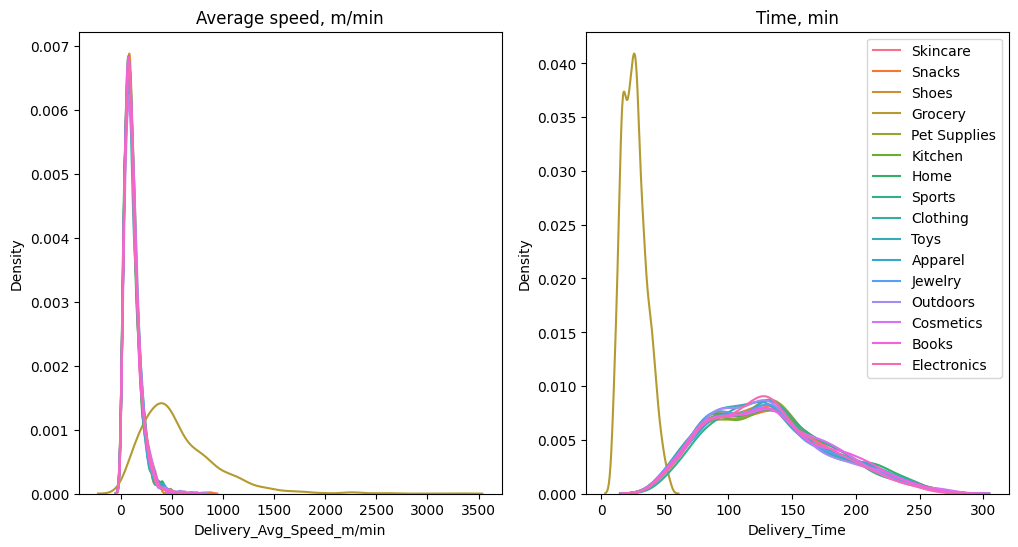

In [482]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
column = data_view['Category'].unique()
palette = iter(sns.husl_palette(len(column)))

for item in column:
    clr = next(palette)
    sns.kdeplot(data=data_view.loc[data_view['Category'] == item,:], x='Delivery_Avg_Speed_m/min', color=clr, label=item,  ax=ax1)
    sns.kdeplot(data=data_view.loc[data_view['Category'] == item,:], x='Delivery_Time', color=clr, label=item,  ax=ax2)
    
ax1.set_title('Average speed, m/min')
ax2.set_title('Time, min')
ax2.legend()

Думаю, что не нужно даже дополнительных статистических проверок, чтобы обозначить что данные по доставке продуктов значительно отличаются от других. Скорее всего к доставке продуктов в компании Amazon кардинально другой подход, поэтому в дальнейшем мы будем рассматривать данные о доcтавке продуктов отдельно от других категорий

In [486]:
data_view_ng = data_view.loc[data_view['Category'] != 'Grocery', :]
data_view_grocery = data_view.loc[data_view['Category'] == 'Grocery', :]

Функция для построения графиков распределений по категориям

In [1121]:
def show_plots(column, col_name):
    #функция принимает список строк(наименований категорий) и строку(наименование столбца, в котором содержатся категории)
    
    fig = plt.figure(constrained_layout=True, figsize=(12, 12))
    fig.suptitle(col_name + ' distributions')
    subfigs = fig.subfigures(nrows=2, ncols=1)
    
    axs = [subfigs[0].subplots(nrows=1, ncols=2), subfigs[1].subplots(nrows=1, ncols=2)]
    subfigs[0].suptitle('Non-grocery')
    subfigs[1].suptitle('Grocery')
    
    
    palette = iter(sns.husl_palette(len(column)))
    i = 0

    #цикл по категориям
    for item in column:
        
        clr = next(palette)
        
        #создание графика распределения
        
        sns.kdeplot(data=data_view_ng.loc[data_view_ng[col_name] == item,:], x='Delivery_Avg_Speed_m/min', color=clr, label=item,  ax=axs[0][0])
        
        #обозначение среднего на графике
        
        mean = data_view_ng.loc[data_view_ng[col_name] == item,'Delivery_Avg_Speed_m/min'].mean()
        kde = axs[0][0].lines[i]
        xs = kde.get_xdata()
        ys = kde.get_ydata()
        height = np.interp(mean, xs, ys)
        axs[0][0].vlines(mean, 0, height, color=clr, ls=':')

        #Извиняюсь за плохой код...
        sns.kdeplot(data=data_view_ng.loc[data_view_ng[col_name] == item,:], x='Delivery_Time', color=clr, label=item,  ax=axs[0][1])
        mean = data_view_ng.loc[data_view_ng[col_name] == item,'Delivery_Time'].mean()
        kde = axs[0][1].lines[i]
        xs = kde.get_xdata()
        ys = kde.get_ydata()
        height = np.interp(mean, xs, ys)
        axs[0][1].vlines(mean, 0, height, color=clr, ls=':')
        
        sns.kdeplot(data=data_view_grocery.loc[data_view_grocery[col_name] == item,:], x='Delivery_Avg_Speed_m/min', color=clr, label=item,  ax=axs[1][0])
        mean = data_view_grocery.loc[data_view_grocery[col_name] == item,'Delivery_Avg_Speed_m/min'].mean()
        kde = axs[1][0].lines[i]
        xs = kde.get_xdata()
        ys = kde.get_ydata()
        height = np.interp(mean, xs, ys)
        axs[1][0].vlines(mean, 0, height, color=clr, ls=':')
        
        sns.kdeplot(data=data_view_grocery.loc[data_view_grocery[col_name] == item,:], x='Delivery_Time', color=clr, label=item,  ax=axs[1][1])
        mean = data_view_grocery.loc[data_view_grocery[col_name] == item,'Delivery_Time'].mean()
        kde = axs[1][1].lines[i]
        xs = kde.get_xdata()
        ys = kde.get_ydata()
        height = np.interp(mean, xs, ys)
        axs[1][1].vlines(mean, 0, height, color=clr, ls=':')
        
        i+=1
        
        
        
        
    axs[0][0].set_title('Average speed, m/min')
    axs[0][1].set_title('Time, min')
    axs[0][1].legend()
    return fig
    




Распределения по погоде

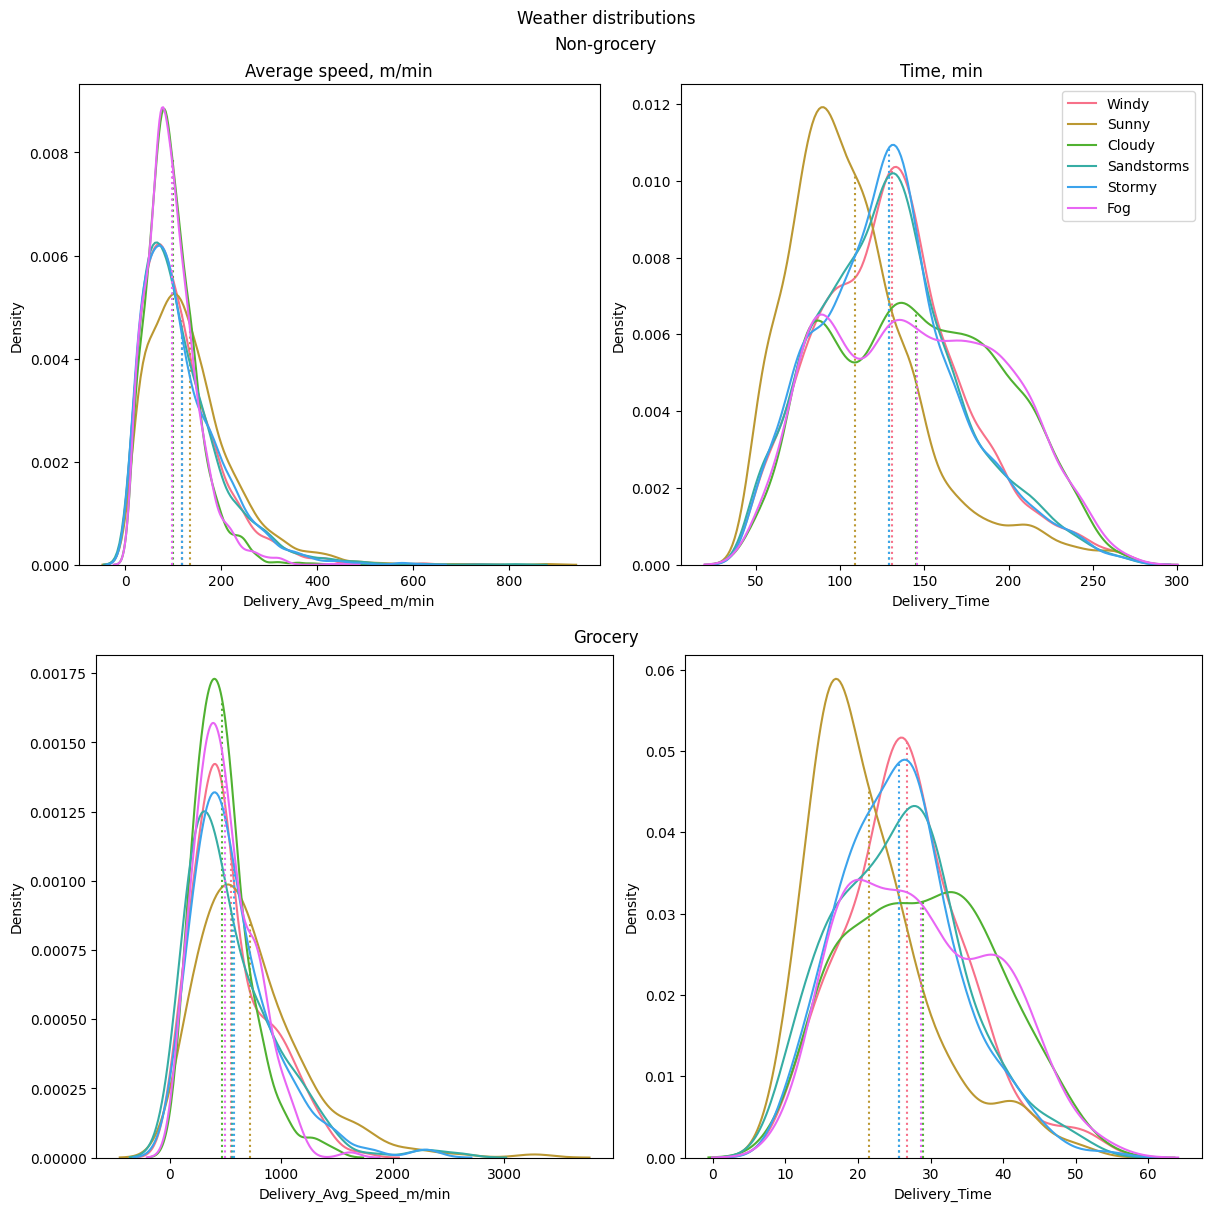

In [1122]:
show_plots(data_view['Weather'].unique(), 'Weather')

Распределения по трафику

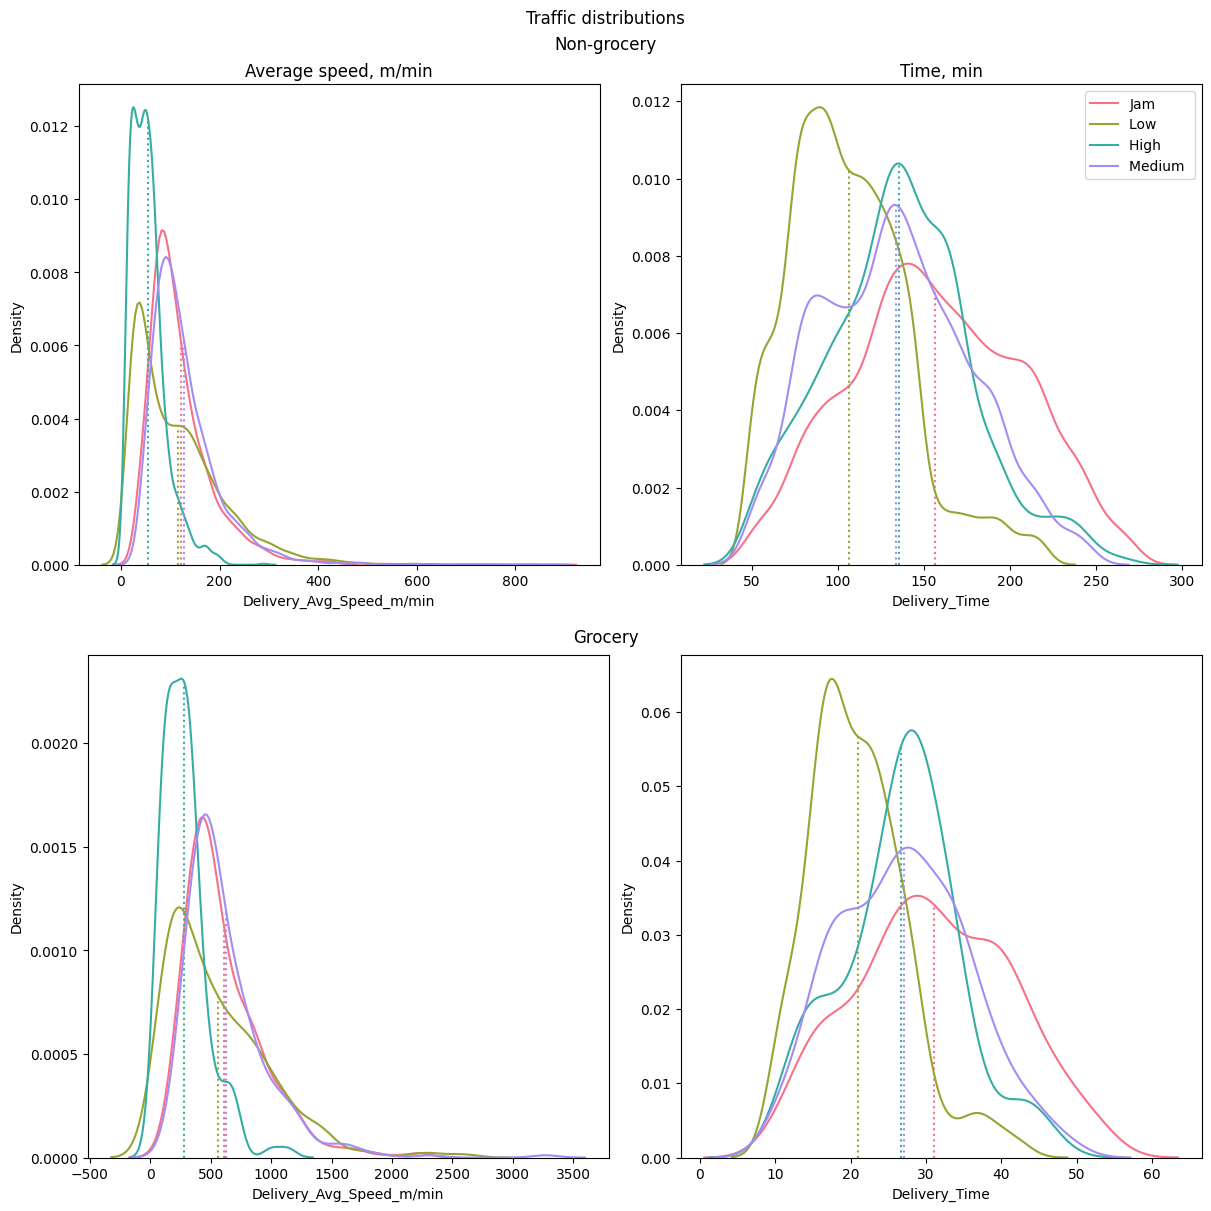

In [1042]:
show_plots(data_view['Traffic'].unique(), 'Traffic')

Распределения по транспорту

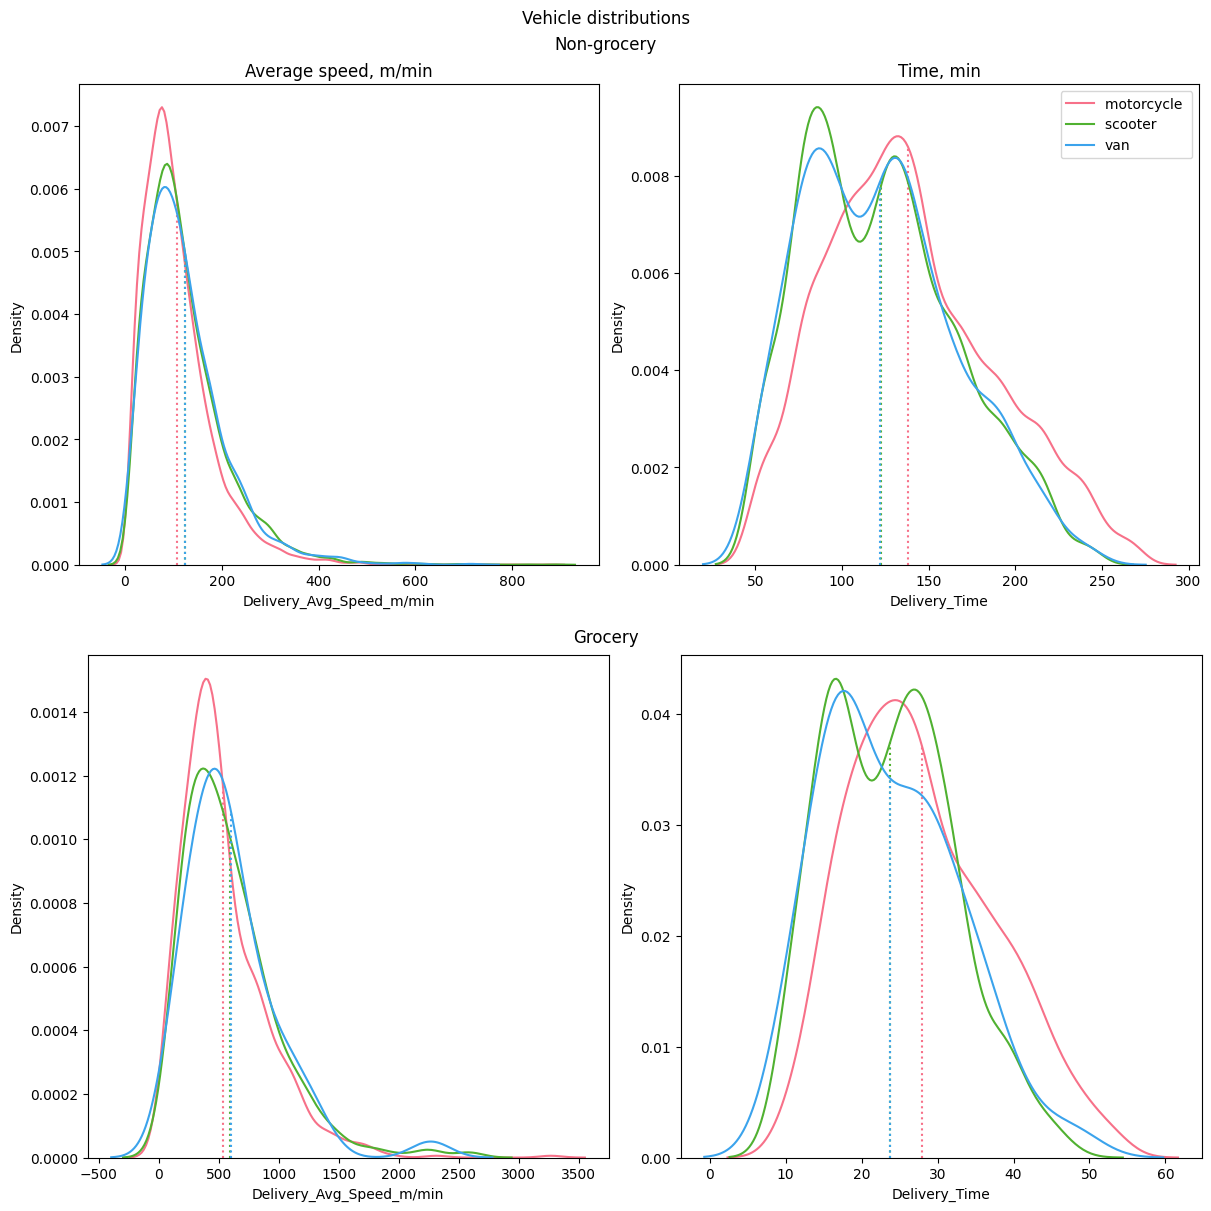

In [1043]:
show_plots(data_view['Vehicle'].unique(), 'Vehicle')

Распределения по местности

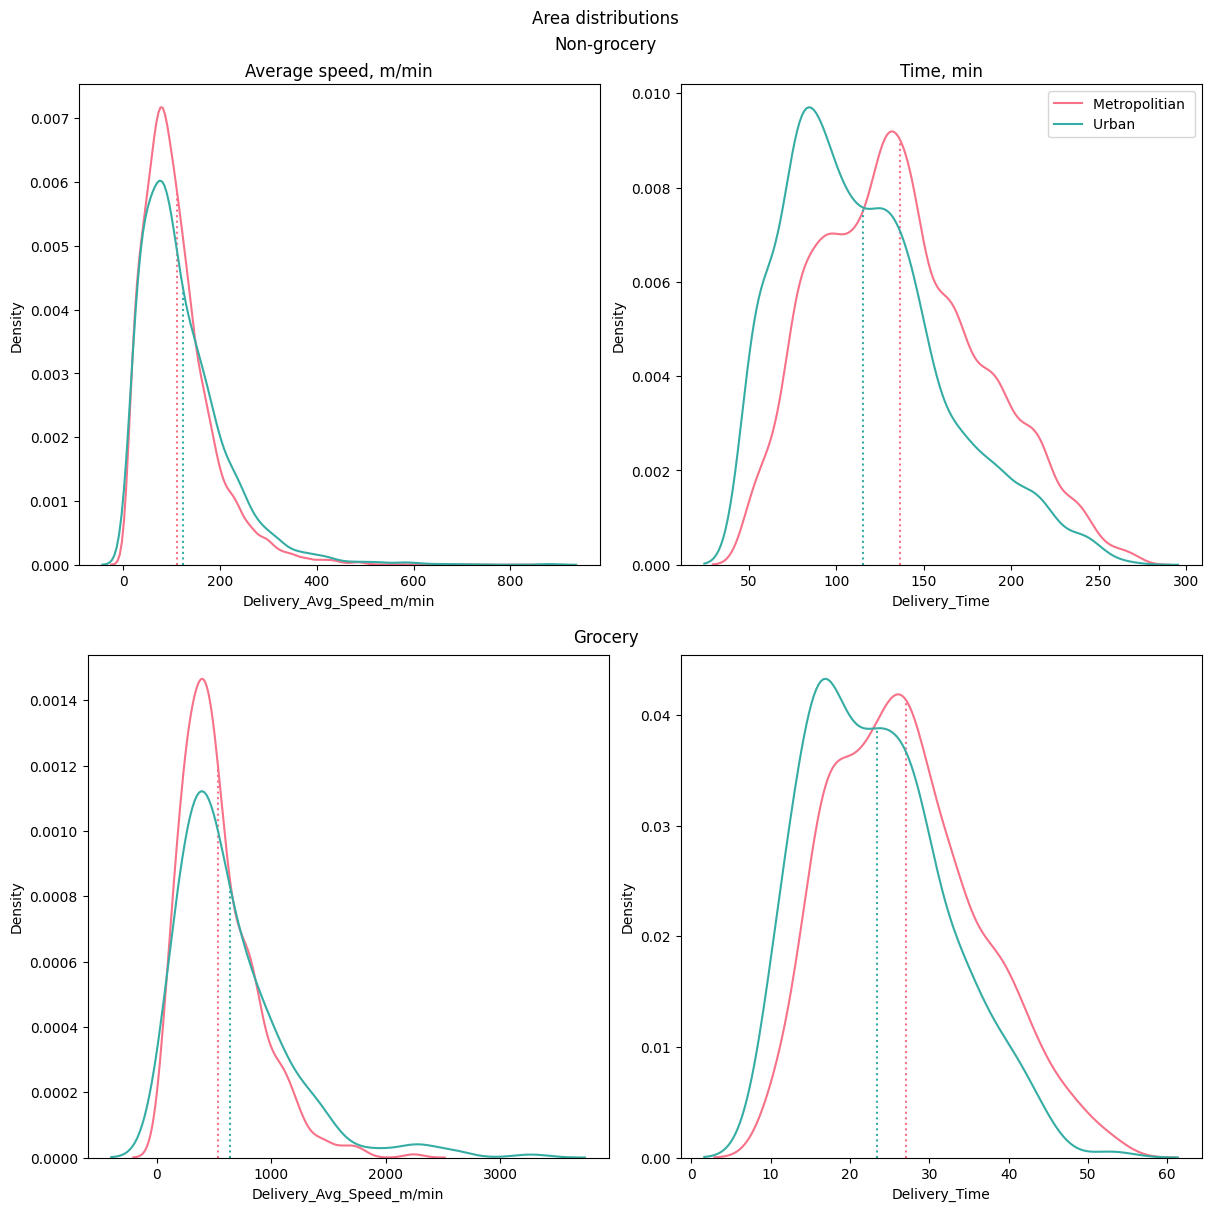

In [1044]:
show_plots(['Metropolitian ', 'Urban '], 'Area')

Распределения по дням недели

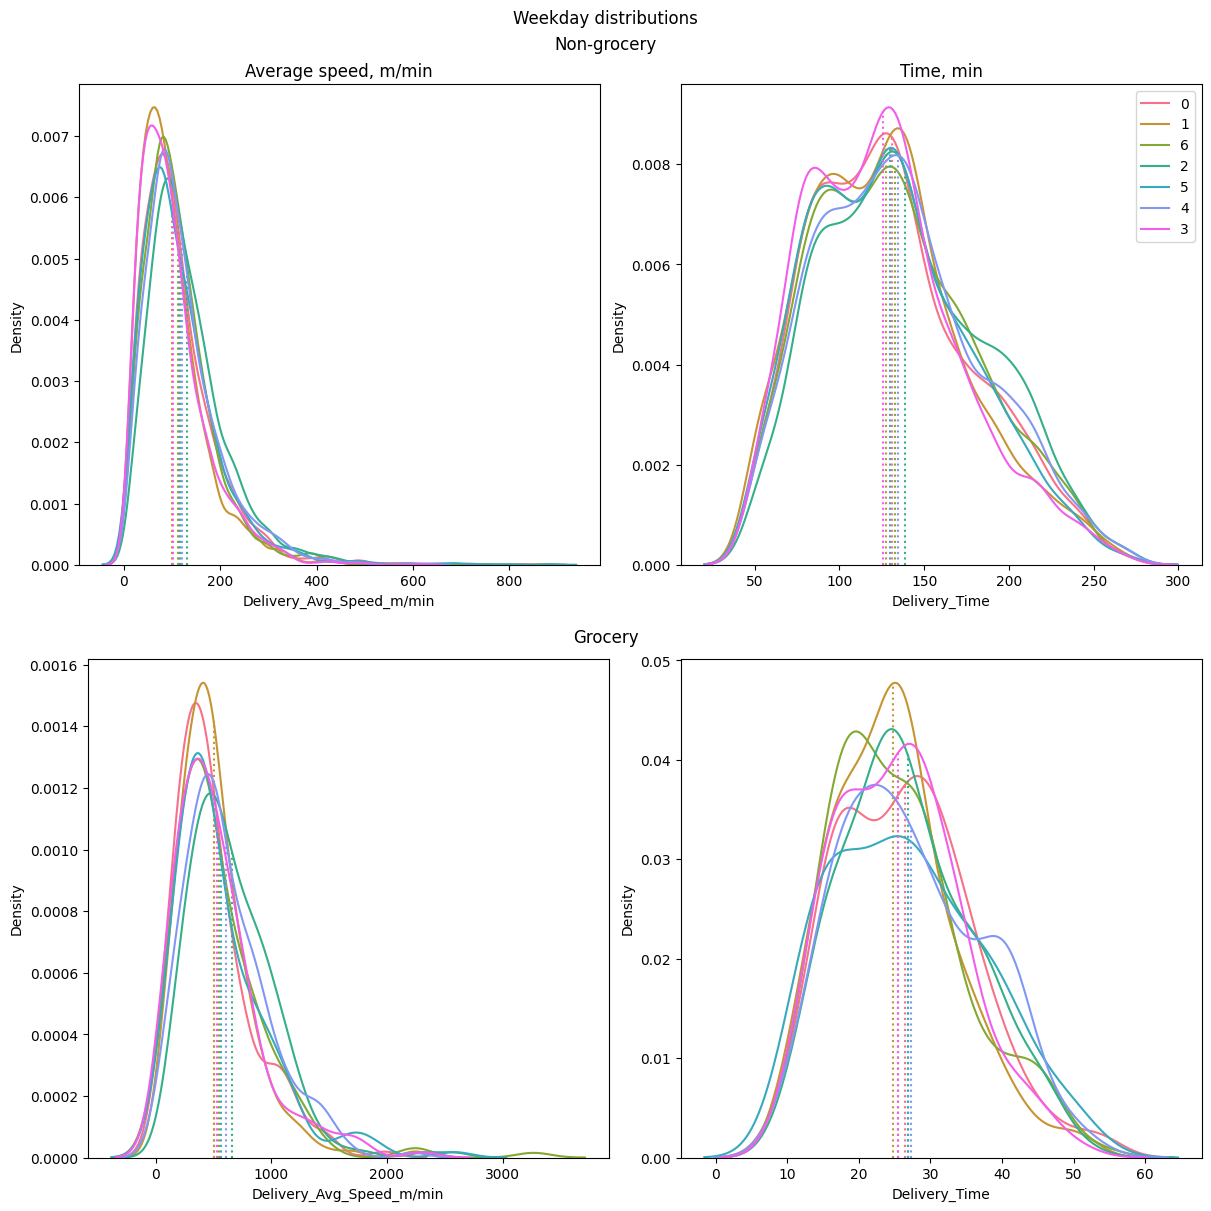

In [1045]:
show_plots(data_view['Weekday'].unique(), 'Weekday')

Распределения по городам

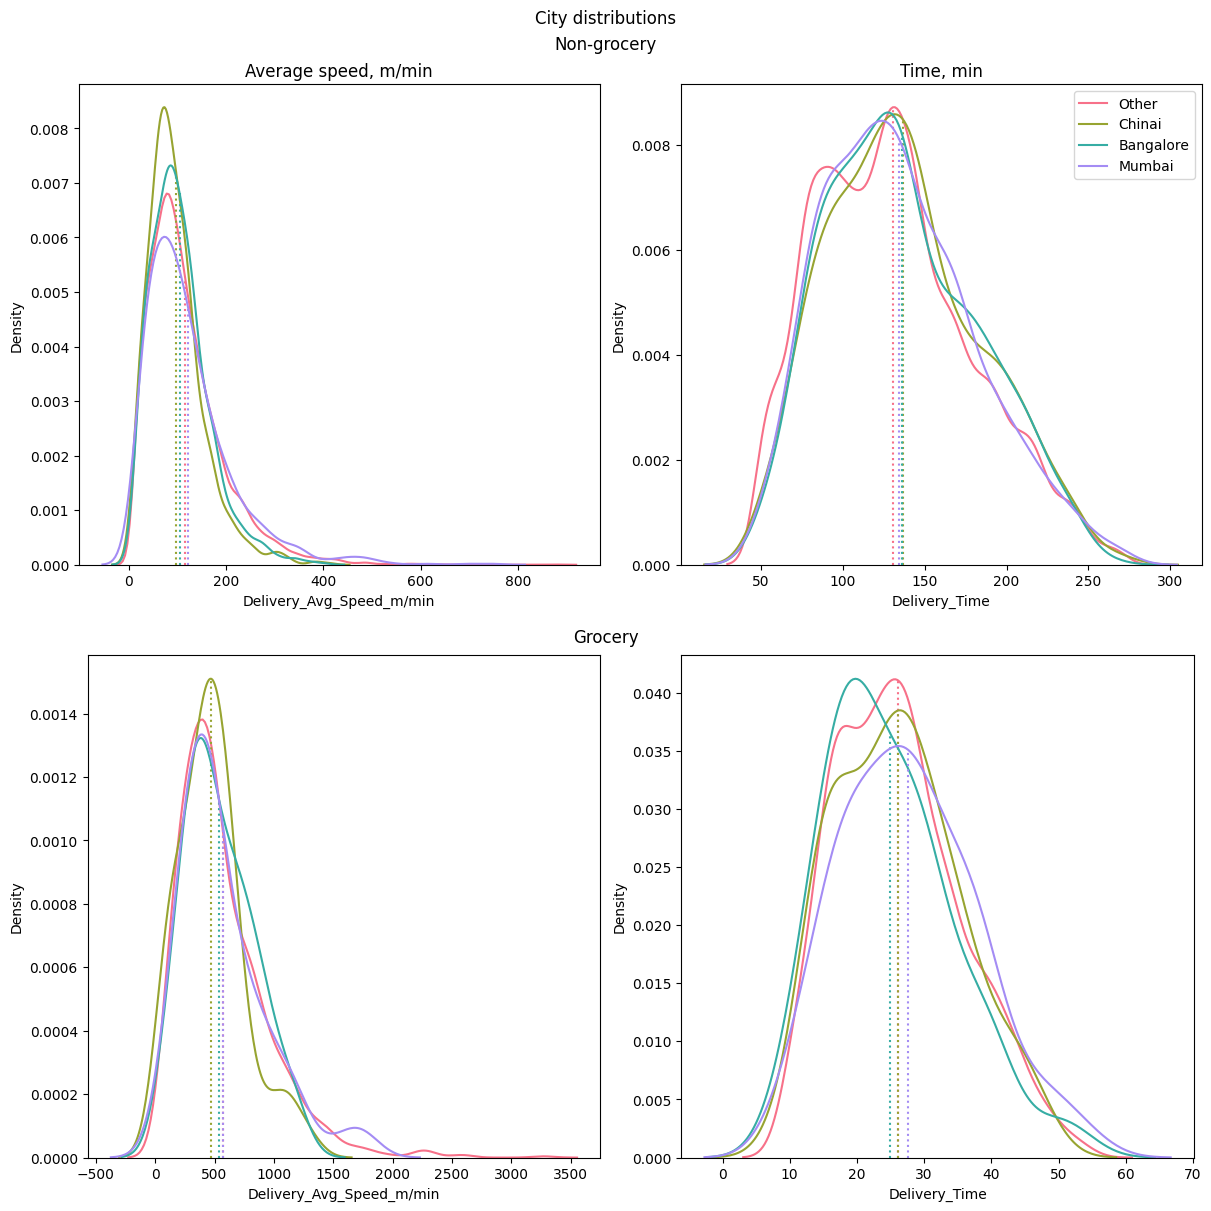

In [1046]:
show_plots(data_view['City'].unique(), 'City')

Здесь я разделил курьеров на "хороших"(с рейтингом >= 4.5) и "плохих"(рейтинг < 4.5)

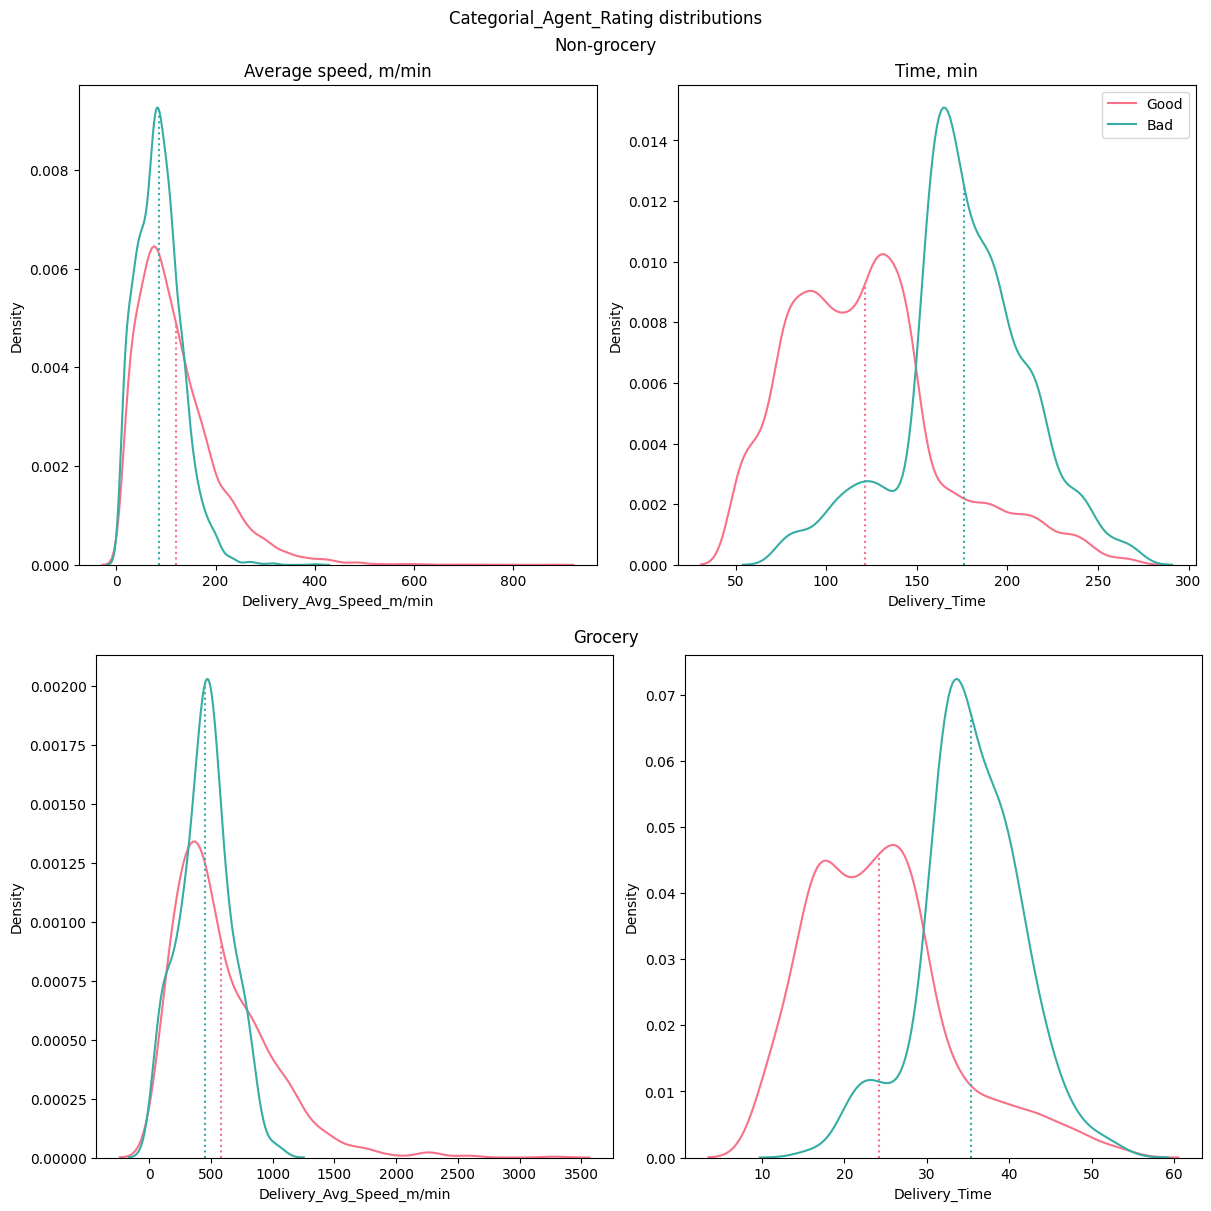

In [1047]:

data_view_ng.loc[:,'Categorial_Agent_Rating'] = 'Good' 
data_view_ng.loc[data_view_ng['Agent_Rating'] < 4.5 ,'Categorial_Agent_Rating'] = 'Bad' 

data_view_grocery.loc[:,'Categorial_Agent_Rating'] = 'Good' 
data_view_grocery.loc[data_view_grocery['Agent_Rating'] < 4.5 ,'Categorial_Agent_Rating'] = 'Bad' 

show_plots(data_view_ng['Categorial_Agent_Rating'].unique(), 'Categorial_Agent_Rating')

Для каждого признака потом проверим гипотезу о равенстве средних

Теперь посмотрим как зависят друг от друга числовые признаки

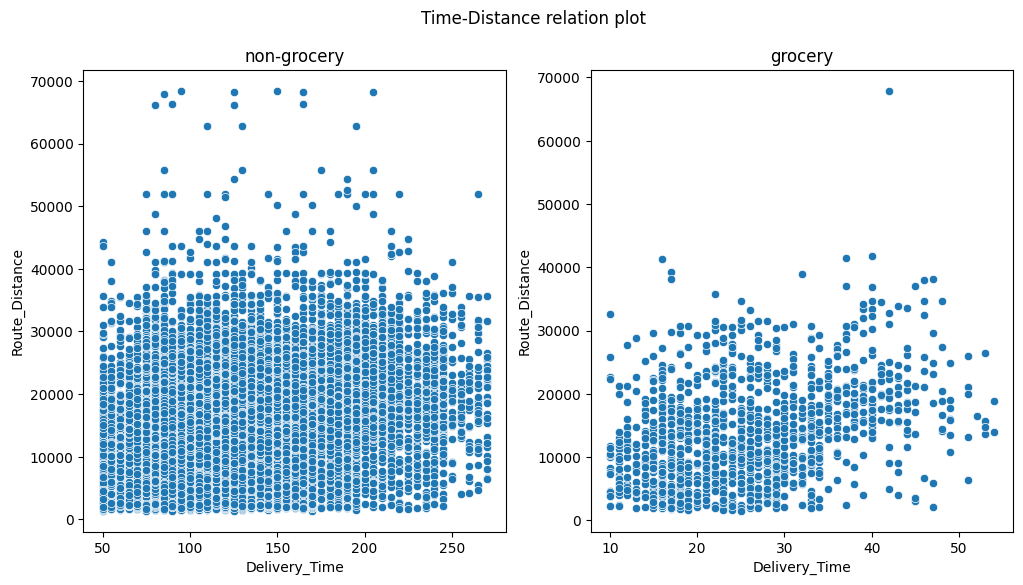

In [578]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Time-Distance relation plot')
ax1.set_title('non-grocery')
ax2.set_title('grocery')

sns.scatterplot(data=data_view_ng, x="Delivery_Time", y="Route_Distance", ax=ax1);
sns.scatterplot(data=data_view_grocery, x="Delivery_Time", y="Route_Distance", ax=ax2);


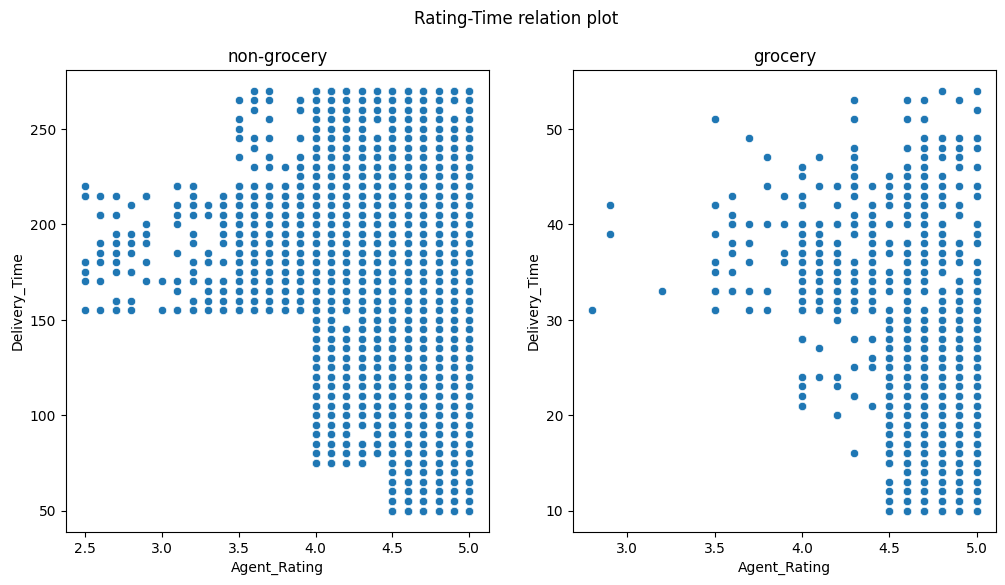

In [579]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Rating-Time relation plot')
ax1.set_title('non-grocery')
ax2.set_title('grocery')

sns.scatterplot(data=data_view_ng, x="Agent_Rating", y="Delivery_Time", ax=ax1);
sns.scatterplot(data=data_view_grocery, x="Agent_Rating", y="Delivery_Time", ax=ax2);

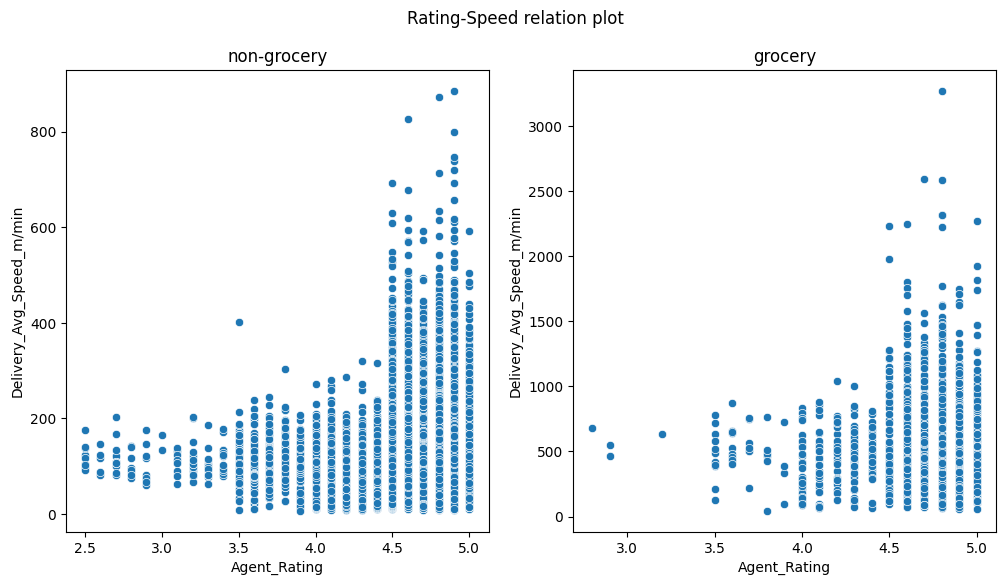

In [580]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Rating-Speed relation plot')
ax1.set_title('non-grocery')
ax2.set_title('grocery')

sns.scatterplot(data=data_view_ng, x="Agent_Rating", y="Delivery_Avg_Speed_m/min", ax=ax1);
sns.scatterplot(data=data_view_grocery, x="Agent_Rating", y="Delivery_Avg_Speed_m/min", ax=ax2);

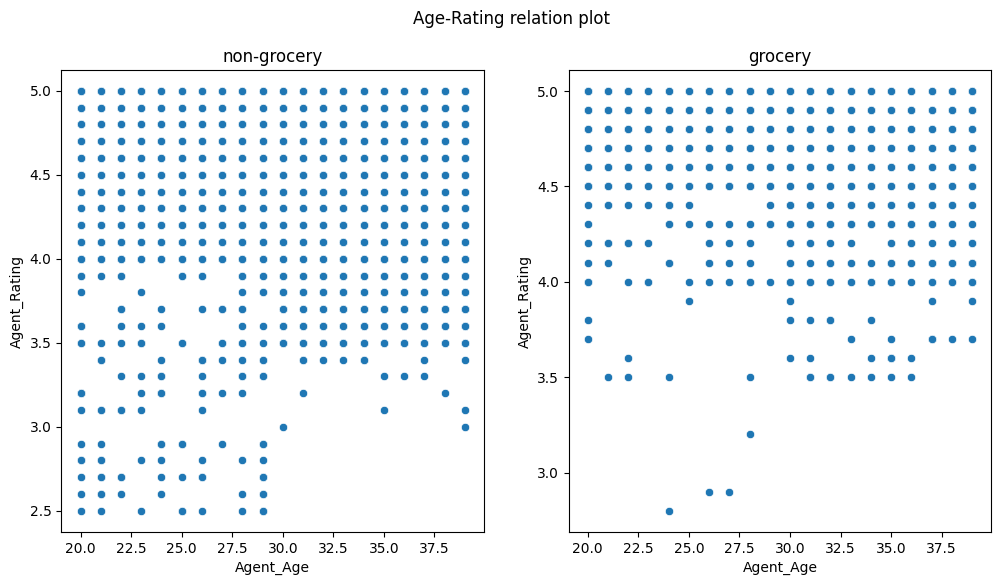

In [594]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Age-Rating relation plot')
ax1.set_title('non-grocery')
ax2.set_title('grocery')

sns.scatterplot(data=data_view_ng, x="Agent_Age", y="Agent_Rating", ax=ax1);
sns.scatterplot(data=data_view_grocery, x="Agent_Age", y="Agent_Rating", ax=ax2);

Для каждой пары в следующем разделе проверим корелляцию

# Проверка гипотез

Сначала разделим данные для проверки на продуктовые и не продуктовые

In [1144]:
data_check.loc[:,'Categorial_Agent_Rating'] = 'Good' 
data_check.loc[data_check['Agent_Rating'] < 4.5 ,'Categorial_Agent_Rating'] = 'Bad'

data_check_ng = data_check.loc[data_check['Category'] != 'Grocery', :]
data_check_grocery = data_check.loc[data_check['Category'] == 'Grocery', :]

## Проверка гипотез на паре независимых выборок

Проверим гипотезу о равенстве средних времени и скорости доставки с альтернативами:
- Местность: В крупном городе("Metropolitian") время доставки больше, а скорость меньше, чем в некрупном("Urban")
- Рейтинг курьера: Время доставки "плохих" курьеров больше, а скорость ниже, чем у "хороших"

Так как данные о времени и скорости распределены ненормально и вообще непонятно как(судя по картинкам), следует использовать непараметрические критерии, я буду использовать критерий Манна Уитни https://ru.wikipedia.org/wiki/U-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9C%D0%B0%D0%BD%D0%BD%D0%B0_%E2%80%94_%D0%A3%D0%B8%D1%82%D0%BD%D0%B8

In [ ]:
from scipy.stats import mannwhitneyu

In [995]:
#создание словаря для хранения реззультатов
mannwhitheyu_res = {'grocery': {'Delivery_Time': {}, 'Delivery_Avg_Speed_m/min': {}}, 'non-grocery': {'Delivery_Time': {}, 'Delivery_Avg_Speed_m/min': {}}}
#проверка гипотез
mannwhitheyu_res['non-grocery']['Delivery_Time']['Area'] = mannwhitneyu(data_check_ng.loc[data_check_ng['Area'] == 'Metropolitian ', 'Delivery_Time'], data_check_ng.loc[data_check_ng['Area'] == 'Urban ', 'Delivery_Time'], alternative='greater')
mannwhitheyu_res['non-grocery']['Delivery_Avg_Speed_m/min']['Area'] = mannwhitneyu(data_check_ng.loc[data_check_ng['Area'] == 'Metropolitian ', 'Delivery_Avg_Speed_m/min'], data_check_ng.loc[data_check_ng['Area'] == 'Urban ', 'Delivery_Avg_Speed_m/min'], alternative='less')

mannwhitheyu_res['grocery']['Delivery_Time']['Area'] = mannwhitneyu(data_check_grocery.loc[data_check_grocery['Area'] == 'Metropolitian ', 'Delivery_Time'], data_check_grocery.loc[data_check_grocery['Area'] == 'Urban ', 'Delivery_Time'], alternative='greater')
mannwhitheyu_res['grocery']['Delivery_Avg_Speed_m/min']['Area'] = mannwhitneyu(data_check_grocery.loc[data_check_grocery['Area'] == 'Metropolitian ', 'Delivery_Avg_Speed_m/min'], data_check_grocery.loc[data_check_grocery['Area'] == 'Urban ', 'Delivery_Avg_Speed_m/min'], alternative='less')

mannwhitheyu_res['non-grocery']['Delivery_Time']['Categorial_Agent_Rating'] = mannwhitneyu(data_check_ng.loc[data_check_ng['Categorial_Agent_Rating'] == 'Bad', 'Delivery_Time'], data_check_ng.loc[data_check_ng['Categorial_Agent_Rating'] == 'Good', 'Delivery_Time'], alternative='greater')
mannwhitheyu_res['non-grocery']['Delivery_Avg_Speed_m/min']['Categorial_Agent_Rating'] = mannwhitneyu(data_check_ng.loc[data_check_ng['Categorial_Agent_Rating'] == 'Bad', 'Delivery_Avg_Speed_m/min'], data_check_ng.loc[data_check_ng['Categorial_Agent_Rating'] == 'Good', 'Delivery_Avg_Speed_m/min'], alternative='less')

mannwhitheyu_res['grocery']['Delivery_Time']['Categorial_Agent_Rating'] = mannwhitneyu(data_check_grocery.loc[data_check_grocery['Categorial_Agent_Rating'] == 'Bad', 'Delivery_Time'], data_check_grocery.loc[data_check_grocery['Categorial_Agent_Rating'] == 'Good', 'Delivery_Time'], alternative='greater')
mannwhitheyu_res['grocery']['Delivery_Avg_Speed_m/min']['Categorial_Agent_Rating'] = mannwhitneyu(data_check_grocery.loc[data_check_grocery['Categorial_Agent_Rating'] == 'Bad', 'Delivery_Avg_Speed_m/min'], data_check_grocery.loc[data_check_grocery['Categorial_Agent_Rating'] == 'Good', 'Delivery_Avg_Speed_m/min'], alternative='less')

Сделаем таблицу с информацией о p-value каждого теста       

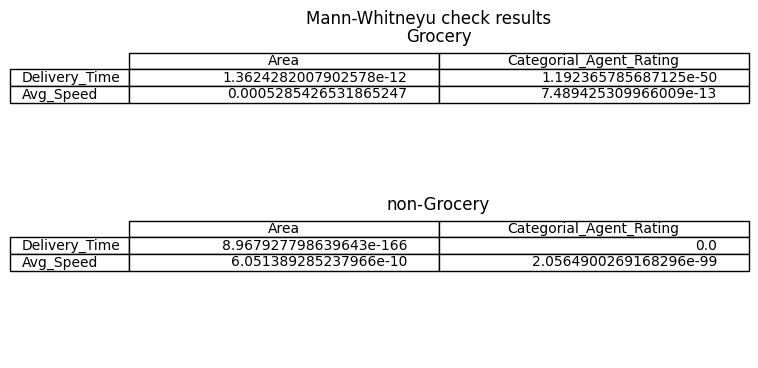

In [1048]:

list_res = []
i, j = [0, 0]
for g in mannwhitheyu_res.keys():
    list_res.append([])
    for c in mannwhitheyu_res[g].keys():
        list_res[i].append([])
        for r in mannwhitheyu_res[g][c].keys():
            list_res[i][j].append(mannwhitheyu_res[g][c][r].pvalue)
        j+=1
    i+=1
    j=0
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4))

fig.patch.set_visible(False)
ax1.axis('off')
ax1.axis('tight')
ax2.axis('off')
ax2.axis('tight')

ax1.table(cellText=np.array(list_res[0]),
          rowLabels= ['Delivery_Time', 'Avg_Speed'],
          colLabels=['Area', 'Categorial_Agent_Rating'], loc="upper center")

ax2.table(cellText=np.array(list_res[1]),
          rowLabels= ['Delivery_Time', 'Avg_Speed'],
          colLabels=['Area', 'Categorial_Agent_Rating'], loc="upper center")

ax1.set_title("Grocery")
ax2.set_title("non-Grocery")
fig.suptitle("Mann-Whitneyu check results");

Видим, что в каждом тесте был достигнут очень маленький уровень значимости, значит гипотезы отвергаем и принимаем альтернативу

Напишем функцию для отображения средних значений в таблице

In [1145]:
def mean_table(col, col_name, grocery):
    res = []
    for item in col:
        if grocery:
            res.append((item, data_check_grocery.loc[data_check_grocery[col_name] == item, 'Delivery_Time'].mean(), data_check_grocery.loc[data_check_grocery[col_name] == item, 'Delivery_Avg_Speed_m/min'].mean()))
        else:
            res.append((item, data_check_ng.loc[data_check_ng[col_name] == item, 'Delivery_Time'].mean(), data_check_ng.loc[data_check_ng[col_name] == item, 'Delivery_Avg_Speed_m/min'].mean()))
    res.sort(key=lambda tup: tup[1]) 
    
    return res

In [1146]:
def show_mean_table(col, col_name):

    plt.ioff()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))

    fig.patch.set_visible(False)
    ax1.axis('off')
    ax1.axis('tight')
    ax2.axis('off')
    ax2.axis('tight')

    
    
    cols = []
    cells = [[], []]
    for item in mean_table(col, col_name, True):
        cols.append(item[0])
        cells[0].append(item[1])
        cells[1].append(item[2])
        
        
    ax1.table(cellText=np.array(cells),
              rowLabels= ['Delivery_Time_min', 'Avg_Speed_m/min'],
              colLabels= cols, loc="upper center")

    cols = []
    cells = [[], []]
    for item in mean_table(col, col_name, False):
        cols.append(item[0])
        cells[0].append(item[1])
        cells[1].append(item[2])
    
    ax2.table(cellText=np.array(cells),
              rowLabels= ['Delivery_Time_min', 'Avg_Speed_m/min'],
              colLabels= cols, loc="upper center")
    
    ax1.set_title("Grocery")
    ax2.set_title("non-Grocery")
    fig.suptitle( col_name + " mean table");

    return fig
    

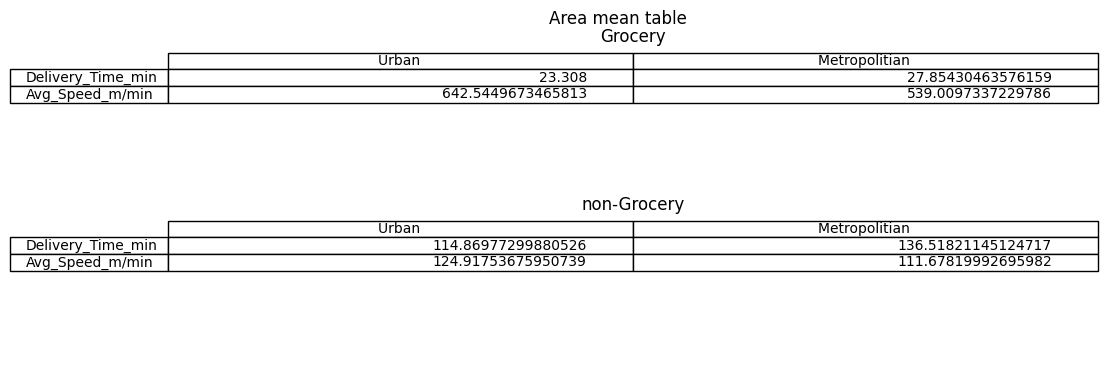

In [1147]:
show_mean_table(['Metropolitian ', 'Urban '], 'Area')

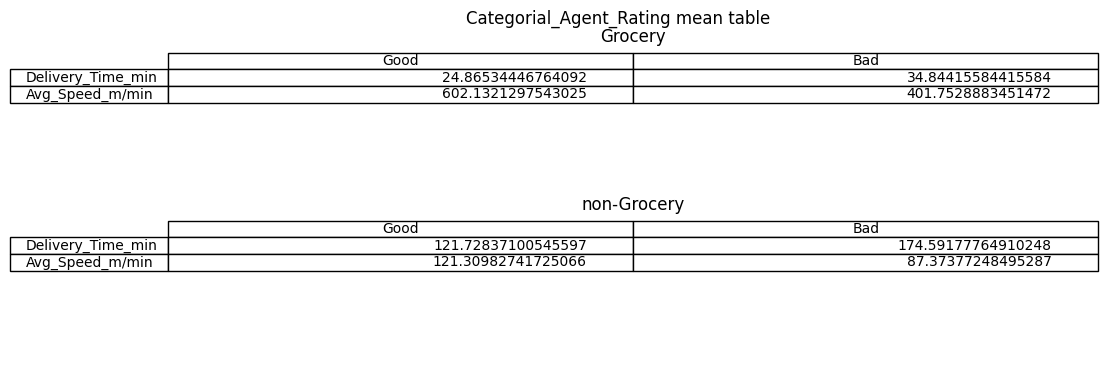

In [1148]:
show_mean_table(data_check_ng['Categorial_Agent_Rating'].unique(), 'Categorial_Agent_Rating')

Можно посмотреть на сколько в среднем различаются рассматриваемые показатели

## Проверка гипотез на нескольких выборках

Сначала проверим гипотезу о равенстве средних времени и скорости доставки по категориям каждого категориального признака. Опять таки из-за ненормальности данных нужен непарамметрический тест, я буду использовать критерий Краскела-Уоллиса. Затем используем критерий Неменьи для попарной проверки

In [516]:
from scipy.stats import kruskal


In [532]:
import scikit_posthocs as sp
from math import factorial

Напишем функции для проверки

In [549]:
def kruskal_check(column, col_name, target, grocery):
    group_data = []
    if grocery == 'grocery':
        for item in column:
            group_data.append(data_check_grocery.loc[data_check_grocery[col_name] == item, target])
    else:
        for item in column:
            group_data.append(data_check_ng.loc[data_check_ng[col_name] == item, target])
    return kruskal(*group_data)


In [556]:
def posthoc_check(column, col_name, target, grocery):
    group_data = []
    
    if grocery == 'grocery':
        for item in column:
            group_data.append(data_check_grocery.loc[data_check_grocery[col_name] == item, target])
    else:
        for item in column:
            group_data.append(data_check_ng.loc[data_check_ng[col_name] == item, target])

    
    c_2_n = factorial(len(group_data))/(2*factorial(len(group_data)-2))    

    #попровка Бонферони
    res = sp.posthoc_nemenyi(group_data)/c_2_n
    res.columns = column
   
    
    return res

Проверка критерием Краскела-Уоллиса

In [552]:
columns_to_check = ['Traffic', 'Weather', 'Vehicle', 'City', 'Weekday']

kruskal_res = {'grocery': {'Delivery_Time': {}, 'Delivery_Avg_Speed_m/min': {}}, 'non-grocery': {'Delivery_Time': {}, 'Delivery_Avg_Speed_m/min': {}}}
posthoc_res = {'grocery': {'Delivery_Time': {}, 'Delivery_Avg_Speed_m/min': {}}, 'non-grocery': {'Delivery_Time': {}, 'Delivery_Avg_Speed_m/min': {}}}

for column in columns_to_check:
    if column == 'City':
        kruskal_res['grocery']['Delivery_Time'][column] = kruskal_check(['Mumbai', 'Chinai', 'Bangalore'], 'City', 'Delivery_Time', 'grocery').pvalue
        kruskal_res['non-grocery']['Delivery_Time'][column] = kruskal_check(['Mumbai', 'Chinai', 'Bangalore'], 'City', 'Delivery_Time', 'non-grocery').pvalue
        kruskal_res['grocery']['Delivery_Avg_Speed_m/min'][column] = kruskal_check(['Mumbai', 'Chinai', 'Bangalore'], 'City', 'Delivery_Avg_Speed_m/min', 'grocery').pvalue
        kruskal_res['non-grocery']['Delivery_Avg_Speed_m/min'][column] = kruskal_check(['Mumbai', 'Chinai', 'Bangalore'], 'City', 'Delivery_Avg_Speed_m/min', 'non-grocery').pvalue
    else:
        kruskal_res['grocery']['Delivery_Time'][column] = kruskal_check(data_check[column].unique(), column, 'Delivery_Time', 'grocery').pvalue
        kruskal_res['non-grocery']['Delivery_Time'][column] = kruskal_check(data_check[column].unique(), column, 'Delivery_Time', 'non-grocery').pvalue
        kruskal_res['grocery']['Delivery_Avg_Speed_m/min'][column] = kruskal_check(data_check[column].unique(), column, 'Delivery_Avg_Speed_m/min', 'grocery').pvalue
        kruskal_res['non-grocery']['Delivery_Avg_Speed_m/min'][column] = kruskal_check(data_check[column].unique(), column, 'Delivery_Avg_Speed_m/min', 'non-grocery').pvalue
        

Проверка критерием Неменьи

In [561]:
for groc in kruskal_res.keys():
    for target in kruskal_res[groc].keys():
        for column in columns_to_check:
            if kruskal_res[groc][target][column] <= 0.05:
                if column == 'City':
                    posthoc_res[groc][target][column] =  posthoc_check(['Mumbai', 'Chinai', 'Bangalore'], column, target, groc)
                else:
                    posthoc_res[groc][target][column] = posthoc_check(np.sort(data_check[column].unique()), column, target, groc)
            else:
                posthoc_res[groc][target][column] = 'Statistically insignificant difference' 

                


Изображение результатов

In [1091]:
def show_heatmap(col_name):
    fig = plt.figure(constrained_layout=True, figsize=(12, 10))
    fig.suptitle(col_name + ' significance heatmap')
    subfigs = fig.subfigures(nrows=2, ncols=1)

    axs = [subfigs[0].subplots(nrows=1, ncols=2), subfigs[1].subplots(nrows=1, ncols=2)]
    subfigs[0].suptitle('Non-grocery')
    subfigs[1].suptitle('Grocery')
    
    
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True}
    t = [['non-grocery', 'grocery'],['Delivery_Avg_Speed_m/min', 'Delivery_Time']]

    for i in range(2):
        for j in range(2):
            if isinstance(posthoc_res[t[0][i]][t[1][j]][col_name], pd.DataFrame): 
                sp.sign_plot(posthoc_res[t[0][i]][t[1][j]][col_name], **heatmap_args, ax = axs[i][j])
            else:
                 axs[i][j].text(.1, .5, "Statistically insignificant difference", color="red")
        

        
    axs[0][0].set_title('Average speed, m/min')
    axs[0][1].set_title('Time, min')

    
    return fig
    
    

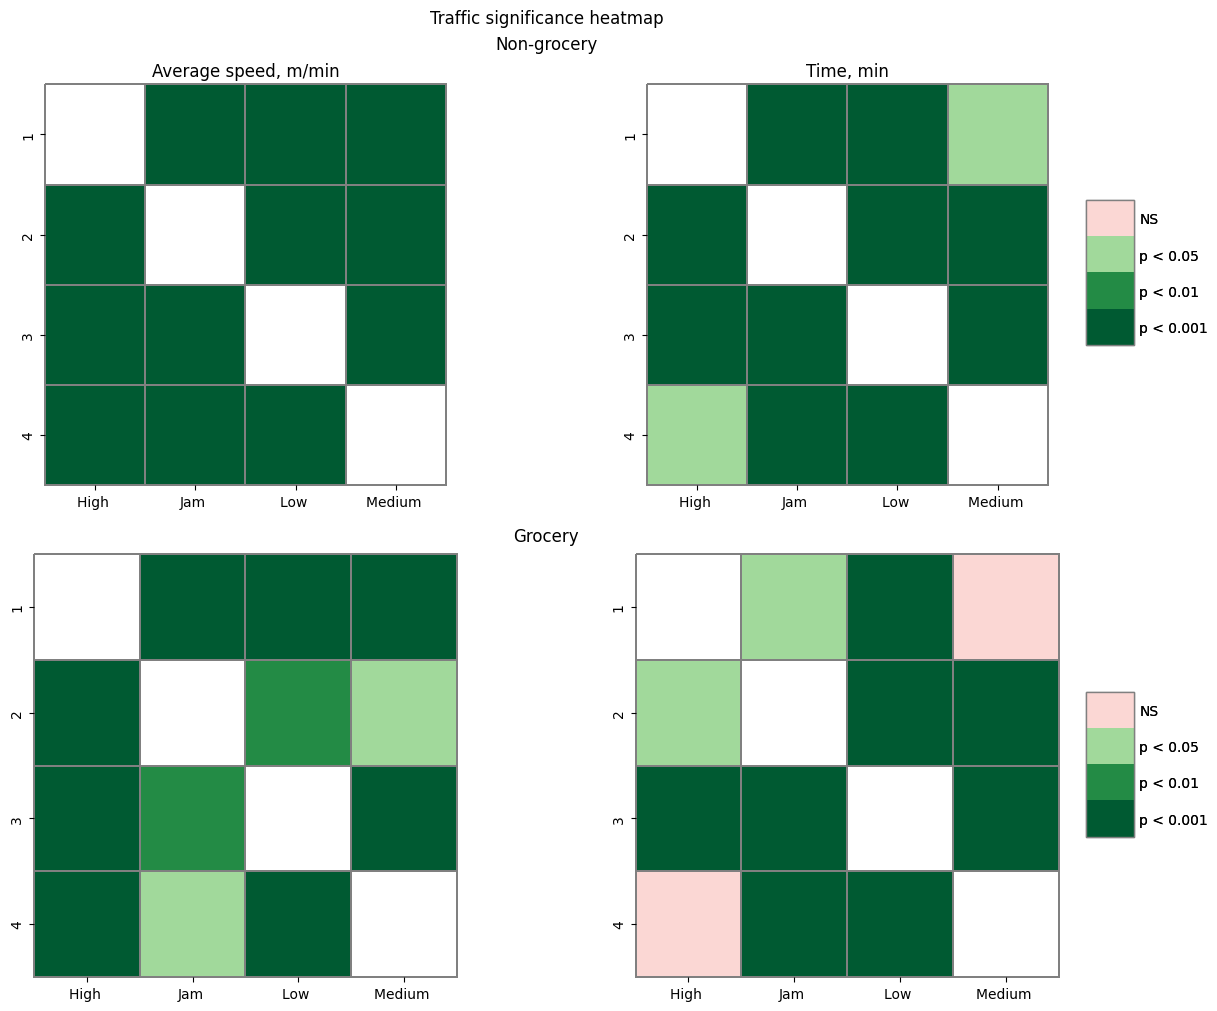

In [1092]:
show_heatmap('Traffic')

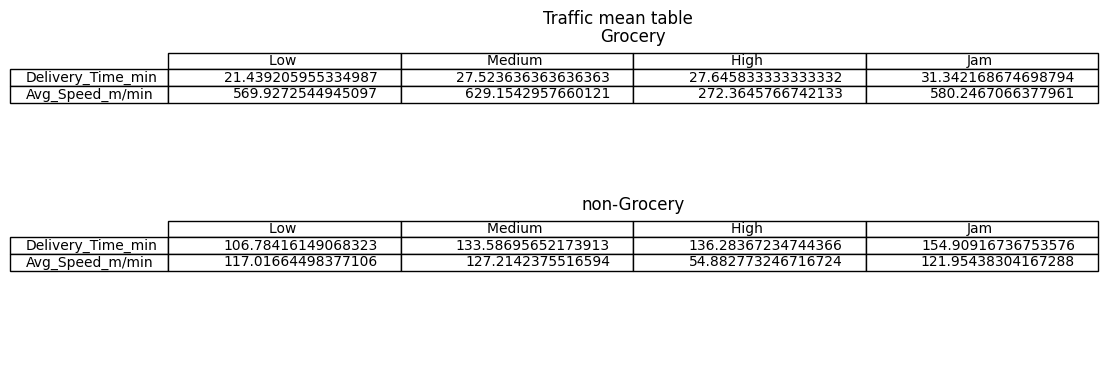

In [1094]:
show_mean_table(data_check_ng['Traffic'].unique(), 'Traffic')

Почти по всем категориям получился значимый результат, кроме пары высокий-средний трафик в продуктах, при этом средняя скорость при среднем трафике намного выше чем при высоком и вообще самая высокая среди всех видов трафика

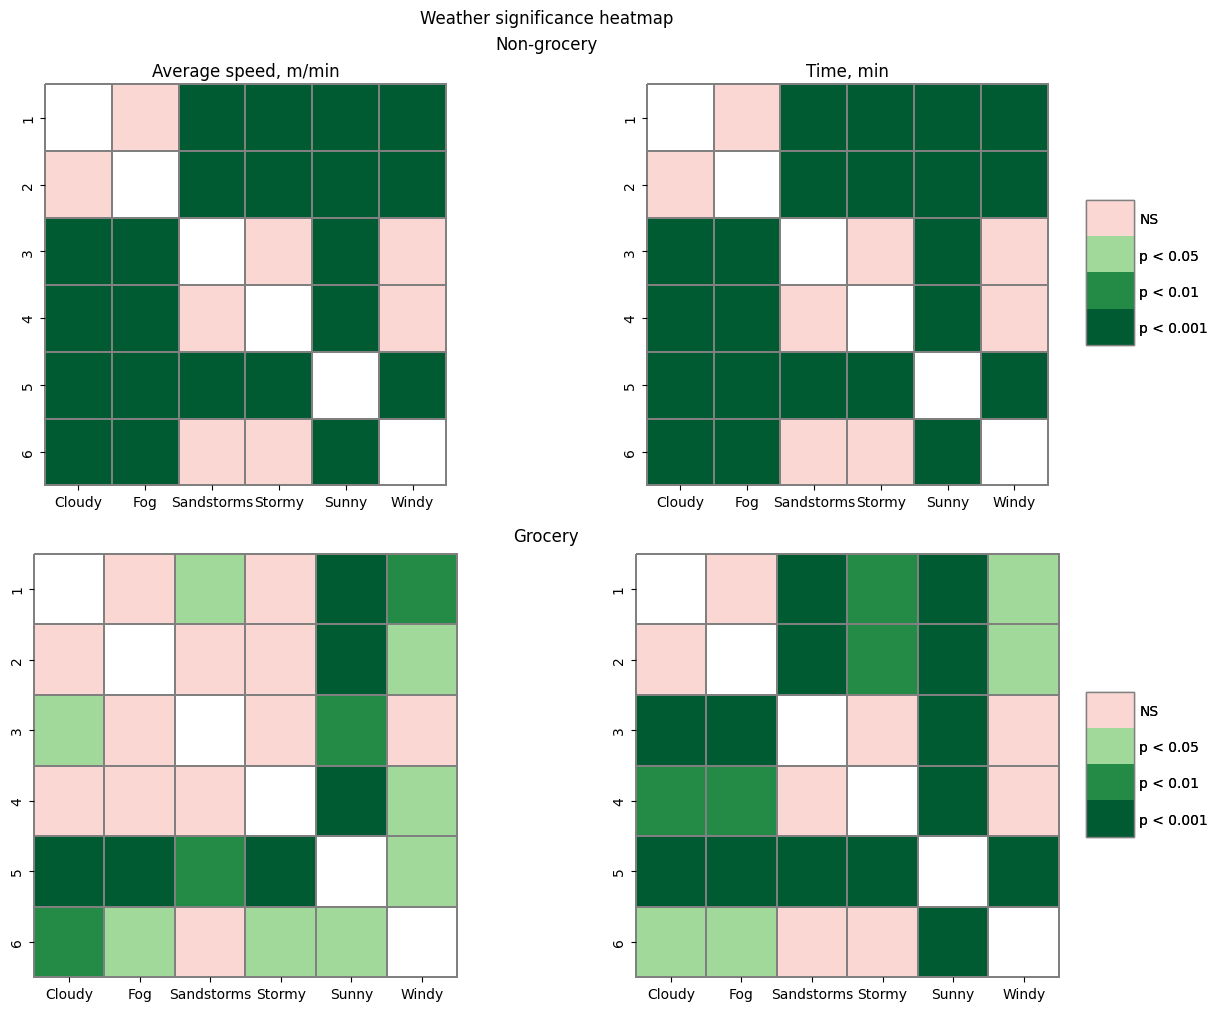

In [1030]:
show_heatmap('Weather')

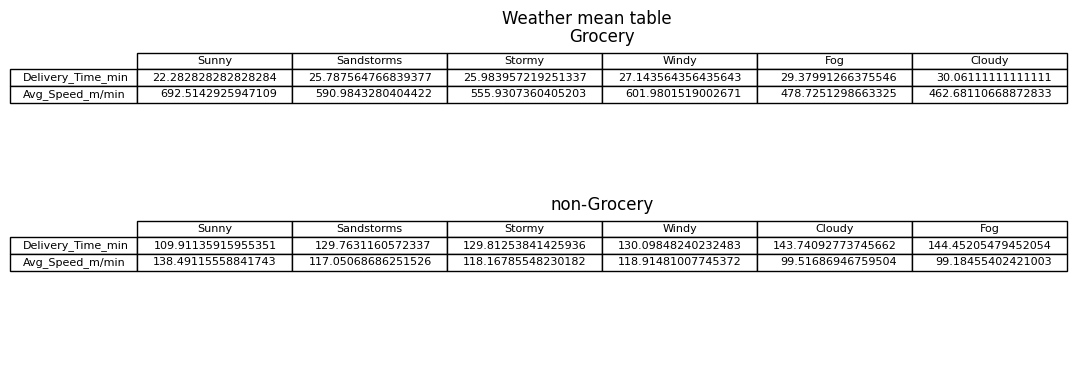

In [1096]:
show_mean_table(data_check_ng['Weather'].unique(), 'Weather')

Погода делится на три группы в первой, самой быстрой, только солнечная погода, во второй ветренная, штормовая и песчанные бури, в третьей, самой медленной туманная и облачная

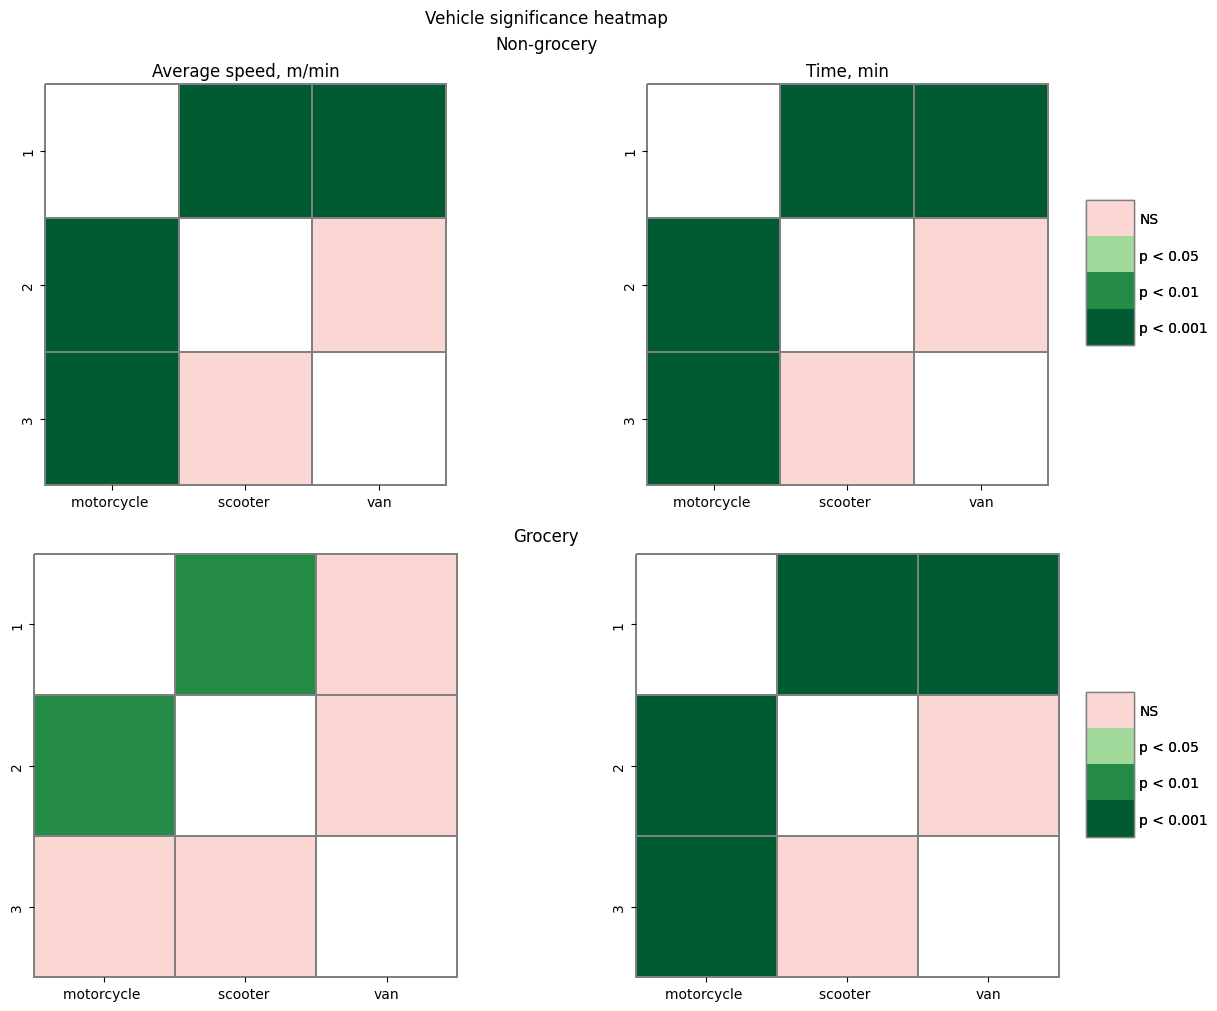

In [1031]:
show_heatmap('Vehicle')

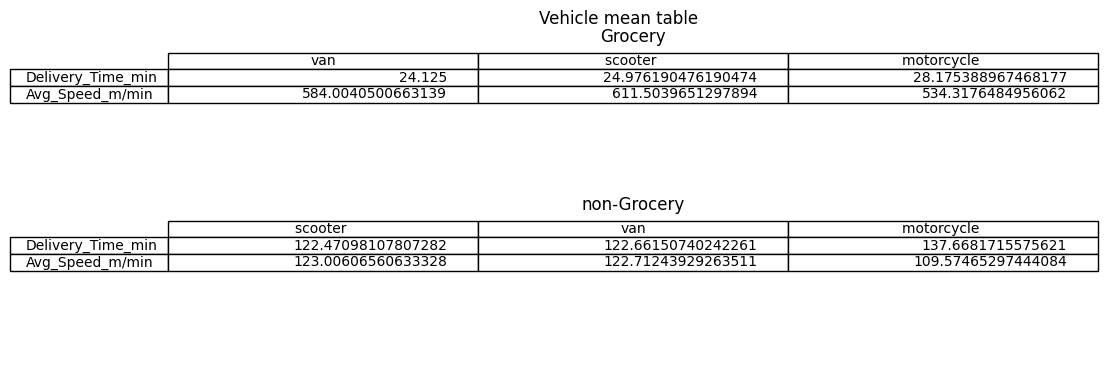

In [1097]:
show_mean_table(data_check_ng['Vehicle'].unique(), 'Vehicle')

На мотоцикле развозить товары оказывается намного дольше чем на фургоне или на скутере, при этом между последними двумя нет статистической разницы

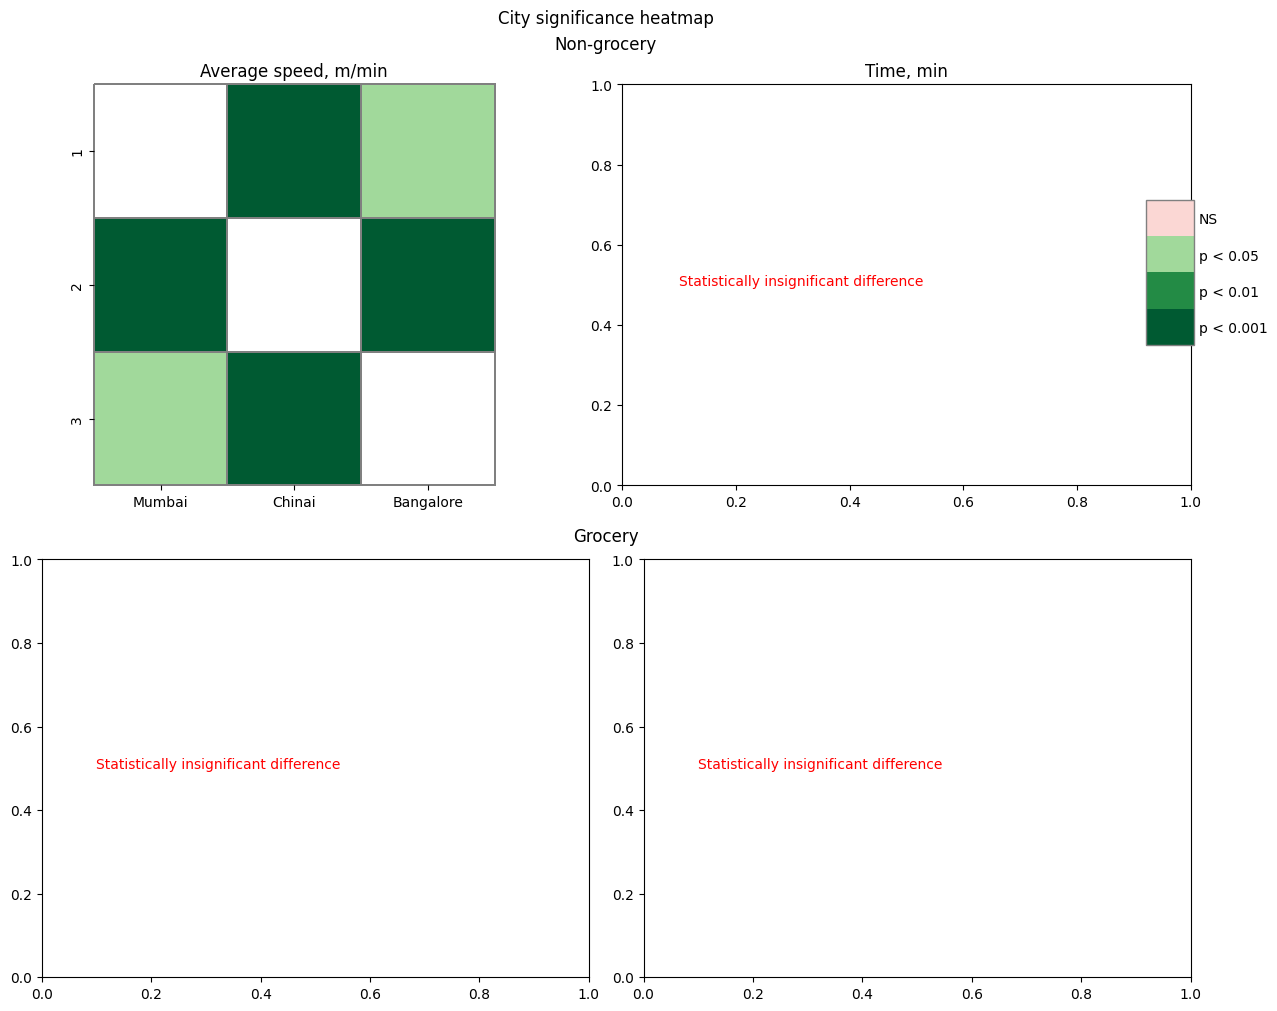

In [1036]:
show_heatmap('City')

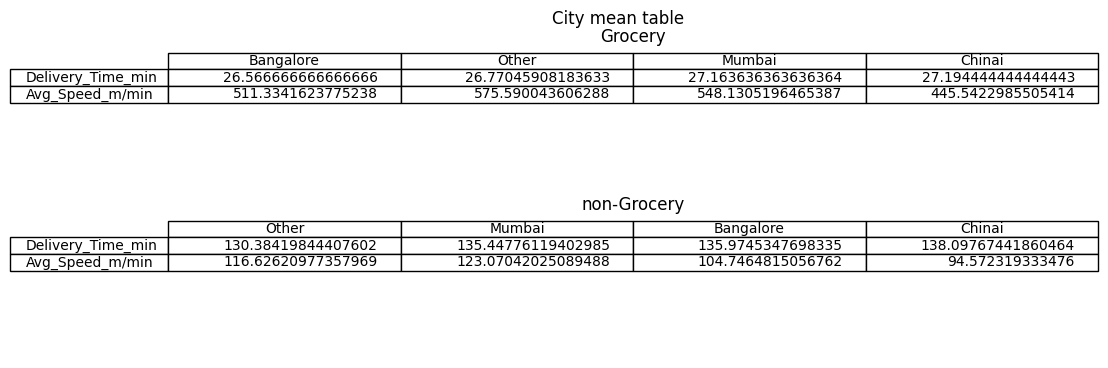

In [1098]:
show_mean_table(data_check_ng['City'].unique(), 'City')

Между доставкой в крупнейших городах Индии почти нет статистически значимых различий, за исключением скорости доставки непродовольственных товаров

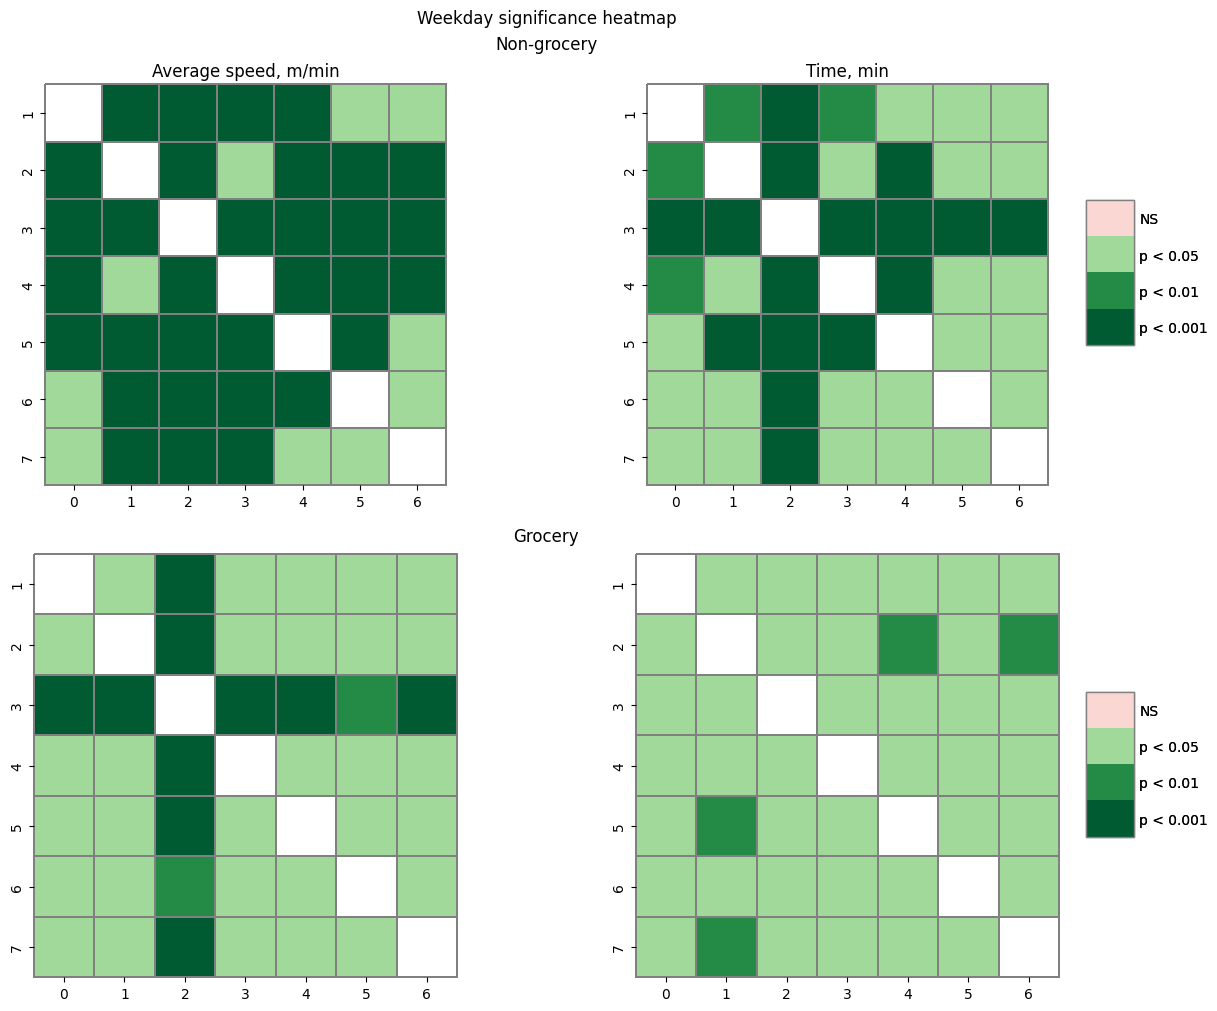

In [1037]:
show_heatmap('Weekday')

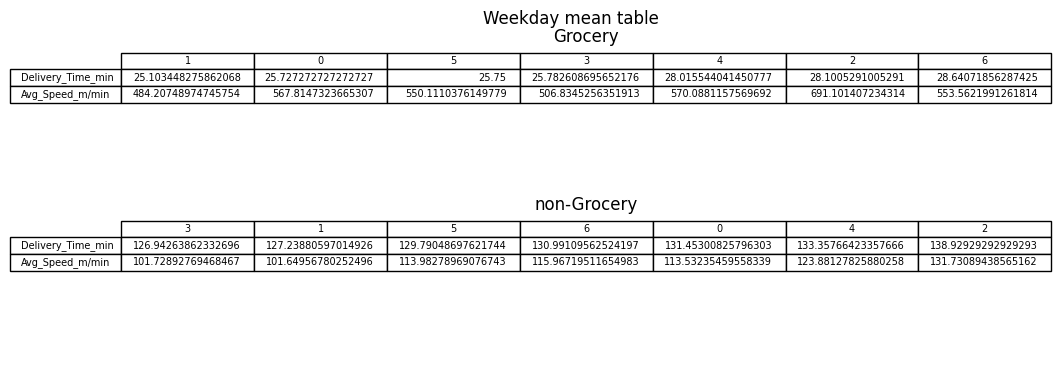

In [1099]:
show_mean_table(data_check_ng['Weekday'].unique(), 'Weekday')

## Корреляционный анализ

In [584]:
from scipy.stats import spearmanr

In [588]:
def spearman_check(col1, col2, grocery):
    if grocery == 'grocery':
        return spearmanr(data_check_grocery.loc[:,col1], data_check_grocery.loc[:,col2])
    else: 
        return spearmanr(data_check_ng.loc[:,col1], data_check_ng.loc[:,col2])

In [589]:
print(spearman_check('Delivery_Time', 'Route_Distance', 'grocery'))
print(spearman_check('Delivery_Time', 'Route_Distance', 'non-grocery'))

SignificanceResult(statistic=0.2996471914498482, pvalue=4.318858635422477e-26)
SignificanceResult(statistic=0.3081233006138767, pvalue=0.0)


In [590]:
print(spearman_check('Agent_Rating', 'Delivery_Time', 'grocery'))
print(spearman_check('Agent_Rating', 'Delivery_Time', 'non-grocery'))

SignificanceResult(statistic=-0.2942816479139148, pvalue=3.4988132496163555e-25)
SignificanceResult(statistic=-0.2955364008214635, pvalue=0.0)


In [592]:
print(spearman_check('Agent_Rating', 'Delivery_Avg_Speed_m/min', 'grocery'))
print(spearman_check('Agent_Rating', 'Delivery_Avg_Speed_m/min', 'non-grocery'))

SignificanceResult(statistic=0.10292761789041878, pvalue=0.0003781952216674768)
SignificanceResult(statistic=0.08782683947243654, pvalue=1.3347705209081781e-33)


In [593]:
print(spearman_check('Agent_Age', 'Agent_Rating', 'grocery'))
print(spearman_check('Agent_Age', 'Agent_Rating', 'non-grocery'))

SignificanceResult(statistic=-0.11442176802526899, pvalue=7.67522411589277e-05)
SignificanceResult(statistic=-0.0994659621396204, pvalue=1.1770071517611594e-42)
